Привет, меня зовут Артем Носенко и я буду проверять твой проект.
<br>Небольшая вступительная часть и начнем работу)
<br> Если не против, то предлагаю общаться на «ты». Если это не удобно - дай знать, и мы перейдем на "вы". Моя основная цель — не указать на совершенные ошибки, а поделиться своим опытом и помочь сделать твой проект лучше. Для этого я буду использовать разный стиль оформления комментариев.
<div class="alert alert-block alert-success">
✔️ Все хорошо.
</div>

<div class="alert alert-warning">
⚠️ Критических замечаний нет, но есть возможность сделать твою работу лучше.
</div>

<div class="alert alert-block alert-danger">
❌ Если требуются исправления. Работа не может быть принята с красными комментариями.
</div>


Давай работать над проектом в диалоге: если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом.
Будет очень хорошо, если ты будешь помечать свои действия следующим образом:
<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> ...
</div>
Пожалуйста, не перемещай, не изменяй и не удаляй мои комментарии. Всё это поможет выполнить повторную проверку твоего проекта оперативнее».


# Инициализация

Загружаем библиотеки необходимые для выполнения кода ноутбука.

In [2]:
# 1.0 Импортируем библиотеки
import logging

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import io

SEED = 0

<b>Комментарий от ревьюера v1</b>
<div class="alert alert-block alert-success">
✔️ Импорты сделаны, отлично! 
</div>

<div class="alert alert-warning">

⚠️ Стоило сразу зафиксировать `SEED`.
</div>
<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Сделано.
</div>

# === ЭТАП 1 ===

# Загрузка первичных данных

Загружаем первичные данные из файлов:
- tracks.parquet
- catalog_names.parquet
- interactions.parquet

In [3]:
# 1.1. Загружаем первичные данные
tracks = pd.read_parquet("tracks.parquet")
print(tracks.shape)
catalog_names = pd.read_parquet("catalog_names.parquet")
print(catalog_names.shape)
interactions = pd.read_parquet("interactions.parquet")
print(interactions.shape)

(1000000, 4)
(1812471, 3)
(222629898, 4)


In [9]:
# 1.2. Смотрим объемы и типы данных
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 4 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   track_id  1000000 non-null  int64 
 1   albums    1000000 non-null  object
 2   artists   1000000 non-null  object
 3   genres    1000000 non-null  object
dtypes: int64(1), object(3)
memory usage: 30.5+ MB


In [10]:
# 1.3. Выводим примеры данных
print(tracks[["track_id", "albums", "artists", "genres"]].sample(5, random_state=52).sort_values("track_id").set_index("track_id").to_string())

                          albums           artists        genres
track_id                                                        
88957     [8201, 88361, 6045574]            [3543]  [11, 44, 75]
46257838               [6233977]         [4383623]       [3, 75]
48263278      [6575614, 7058305]  [678505, 611169]          [68]
61200248               [9527234]          [915312]          [11]
97110155              [19968185]         [4172355]     [14, 102]


In [11]:
# 1.4. Смотрим объемы и типы данных
catalog_names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1812471 entries, 0 to 1812470
Data columns (total 3 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   id      int64 
 1   type    object
 2   name    object
dtypes: int64(1), object(2)
memory usage: 41.5+ MB


In [27]:
# 1.5. Выводим примеры данных
print(catalog_names[["id", "type", "name"]].sample(20, random_state=52).sort_values("id").set_index("id").to_string())

            type                                                          name
id                                                                            
20982      album                                                 Tracy Chapman
881376    artist                                                          Avok
1099375    album                                           Love Me Do - Single
2289425    track                                               The Way It Goes
2389918   artist                                          Colt and the Old 45s
3095939    album                                      The Wonder of the Forest
3176856    album                                            Big Pop Essentials
4330860   artist                                                         T.O.N
4391393    album                                            Music for Wellness
6546443   artist                                                      no suits
9753186    album                                    

In [13]:
# 1.6. Смотрим объемы и типы данных
interactions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 222629898 entries, 0 to 291
Data columns (total 4 columns):
 #   Column      Dtype         
---  ------      -----         
 0   user_id     int32         
 1   track_id    int32         
 2   track_seq   int16         
 3   started_at  datetime64[ns]
dtypes: datetime64[ns](1), int16(1), int32(2)
memory usage: 5.4 GB


In [14]:
# 1.7. Выводим примеры данных
print(interactions[["user_id", "track_id", "track_seq", "started_at"]].sample(5, random_state=52).sort_values("user_id").set_index(["user_id", "track_id"]).to_string())

                  track_seq started_at
user_id track_id                      
46179   29544272         37 2022-11-23
70117   28213677       1055 2022-09-18
72819   85090862        270 2022-08-08
471152  55682            18 2022-09-10
688081  220497          211 2022-02-22


# Обзор данных

Проверяем данные, есть ли с ними явные проблемы.

In [4]:
# 1.8. Проверим данные на пропуски
empty_rows = tracks[tracks.isnull().any(axis=1)]
print(empty_rows)
empty_rows = catalog_names[catalog_names.isnull().any(axis=1)]
print(empty_rows)
empty_rows = interactions[interactions.isnull().any(axis=1)]
print(empty_rows)


Empty DataFrame
Columns: [track_id, albums, artists, genres]
Index: []
Empty DataFrame
Columns: [id, type, name]
Index: []
Empty DataFrame
Columns: [user_id, track_id, track_seq, started_at]
Index: []


In [4]:
# 1.9. Проверим данные на наличие дубликатов
num_duplicates = tracks['track_id'].duplicated().sum()
print(f"Количество дубликатов: {num_duplicates}")
num_duplicates = catalog_names['id'].duplicated().sum()
print(f"Количество дубликатов: {num_duplicates}")
num_duplicates = interactions[['user_id', 'track_id']].duplicated().sum()
print(f"Количество дубликатов: {num_duplicates}")


Количество дубликатов: 0
Количество дубликатов: 35774
Количество дубликатов: 0


In [5]:
print(catalog_names.shape)
print(catalog_names['type'].unique())


(1812471, 3)
['album' 'artist' 'genre' 'track']


In [6]:
print('Количество жанров в каталоге', len(catalog_names[catalog_names['type'] == 'genre']))
print('Количество артистов в каталоге', len(catalog_names[catalog_names['type'] == 'artist']))
print('Количество альбомов в каталоге', len(catalog_names[catalog_names['type'] == 'album']))
print('Количество песен в каталоге', len(catalog_names[catalog_names['type'] == 'track']))

Количество жанров в каталоге 166
Количество артистов в каталоге 153581
Количество альбомов в каталоге 658724


Количество песен в каталоге 1000000


In [5]:
# 1.11. Проверяем, есть ли какие-то значения genres, которых нет в каталоге
print(catalog_names.shape)
print(tracks.shape)
catalog_values = catalog_names[catalog_names['type'] == 'genre']
print(catalog_values.head(5))
catalog_genre_ids = catalog_values['id'].tolist()
print('Количество жанров по каталогу', len(catalog_genre_ids))
print(catalog_genre_ids[:20])

# Разворачиваем списки в столбцах tracks
# Преобразуем столбец genres в один массив, объединив все элементы
all_genres = np.concatenate(tracks['genres'].to_numpy())

# Получим уникальные идентификаторы
unique_genres = np.unique(all_genres)

unique_genres_list = unique_genres.tolist()

print('Количество жанров по трекам', len(unique_genres_list))
print(unique_genres_list[:20])

# Проверяем, есть ли какие-то значения, отсутствующие в catalog_names
missing_values = set(unique_genres_list) - set(catalog_genre_ids)
print('Количество жанров которых нет в каталоге', len(missing_values))
print(missing_values)



(1812471, 3)
(1000000, 4)
        id   type      name
812305   0  genre       all
812306   1  genre   eastern
812307   2  genre   rusrock
812308   3  genre    rusrap
812309   4  genre  postrock
Количество жанров по каталогу 166
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Количество жанров по трекам 173
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
Количество жанров которых нет в каталоге 30
{130, 131, 132, 133, 134, 135, 146, 148, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 124, 126}


In [6]:
# 1.12 Проверим, что в списке треков есть отсутствующий жанр (id=126)
filtered_row = tracks[tracks['genres'].apply(lambda x: 126 in x)]

print(filtered_row[['track_id', 'genres']].head(2))
# Да, действительно есть!

        track_id      genres
594874  41276439  [109, 126]
594875  41276440  [109, 126]


In [7]:
# 1.13 Проверим отсутствующий жанр с id 126
item = catalog_names[catalog_names['id'] == 126]
print(item)
# По факту с айди 126 оказался альбом и артист, но не жанр.

         id    type                              name
49      126   album  Arma-goddamn-motherfuckin-geddon
658748  126  artist                      The Fourmost


In [8]:
# 1.14 Удадим неизвестные жанры из треков
def remove_missing_values(genres):
    return [genre for genre in genres if genre not in missing_values]

# Применяем функцию к колонке genres
tracks['genres'] = tracks['genres'].apply(remove_missing_values)

In [9]:
# 1.15 Проверим, что отсутствующих жанров более нет в списке треков
track = tracks[tracks['track_id'] == 41276439]

print(track)
# Да, действительно нет! Остался только 109-ый жанр.

        track_id     albums    artists genres
594874  41276439  [5399029]  [2674544]  [109]


In [12]:
# 1.16. Проверяем, есть ли какие-то значения artists, которых нет в каталоге
catalog_values = catalog_names[catalog_names['type'] == 'artist']
print(catalog_values.head(5))
catalog_ids = catalog_values['id'].tolist()
print('Количество значений по каталогу', len(catalog_ids))
print(catalog_ids[:20])

# Разворачиваем списки в столбцах tracks
# Преобразуем столбец genres в один массив, объединив все элементы
all = np.concatenate(tracks['artists'].to_numpy())

# Получим уникальные идентификаторы
unique_values = np.unique(all)

unique_list = unique_values.tolist()

print('Количество значений по трекам', len(unique_list))
print(unique_list[:20])

# Проверяем, есть ли какие-то значения, отсутствующие в catalog_names
missing_values = set(unique_list) - set(catalog_ids)
print('Количество значений которых нет в каталоге', len(missing_values))
print(missing_values)

        id    type           name
658724   4  artist   Kenny Dorham
658725   5  artist      Max Roach
658726   7  artist  Francis Rossi
658727   9  artist     Status Quo
658728  12  artist    Phil Everly
Количество значений по каталогу 153581
[4, 5, 7, 9, 12, 14, 15, 16, 22, 31, 33, 34, 36, 42, 80, 84, 86, 87, 90, 92]


Количество значений по трекам 153581
[4, 5, 7, 9, 12, 14, 15, 16, 22, 31, 33, 34, 36, 42, 80, 84, 86, 87, 90, 92]
Количество значений которых нет в каталоге 0
set()


In [ ]:
# 1.17. Проверяем, есть ли какие-то значения albums, которых нет в каталоге
catalog_values = catalog_names[catalog_names['type'] == 'album']
print(catalog_values.head(5))
catalog_ids = catalog_values['id'].tolist()
print('Количество значений по каталогу', len(catalog_ids))
print(catalog_ids[:20])

# Преобразуем столбец в один массив, объединив все элементы
all = np.concatenate(tracks['albums'].to_numpy())

# Получим уникальные идентификаторы
unique_values = np.unique(all)

unique_list = unique_values.tolist()

print('Количество значений по трекам', len(unique_list))
print(unique_list[:20])

# Проверяем, есть ли какие-то значения, отсутствующие в catalog_names
missing_values = set(unique_list) - set(catalog_ids)
print('Количество значений которых нет в каталоге', len(missing_values))
print(missing_values)

   id   type               name
0   3  album    Taller Children
1  12  album  Wild Young Hearts
2  13  album      Lonesome Crow
3  17  album      Graffiti Soul
4  26  album     Blues Six Pack
Количество значений по каталогу 658724
[3, 12, 13, 17, 26, 27, 29, 34, 36, 39, 43, 45, 48, 49, 52, 54, 57, 58, 63, 65]
Количество значений по трекам 658724
[3, 12, 13, 17, 26, 27, 29, 34, 36, 39, 43, 45, 48, 49, 52, 54, 57, 58, 63, 65]
Количество значений которых нет в каталоге 0
set()


In [39]:
# 1.18. Проверяем, есть ли какие-то значения tracks, которых нет в каталоге
catalog_values = catalog_names[catalog_names['type'] == 'track']
print(catalog_values.head(5))
catalog_ids = catalog_values['id'].tolist()
print('Количество значений по каталогу', len(catalog_ids))
print(catalog_ids[:20])

# Разворачиваем списки в столбцах tracks
# Преобразуем столбец genres в один массив, объединив все элементы
all = np.array(tracks['track_id'].to_numpy())

# Получим уникальные идентификаторы
unique_values = np.unique(all)

unique_list = unique_values.tolist()

print('Количество значений по трекам', len(unique_list))
print(unique_list[:20])

# Проверяем, есть ли какие-то значения, отсутствующие в catalog_names
missing_values = set(unique_list) - set(catalog_ids)
print('Количество значений которых нет в каталоге', len(missing_values))
print(missing_values)

         id   type                                 name
812471   26  track                     Complimentary Me
812472   38  track                          Momma's Boy
812473  135  track                              Atticus
812474  136  track                             24 Hours
812475  138  track  Don't Upset The Rhythm (Go Baby Go)
Количество значений по каталогу 1000000
[26, 38, 135, 136, 138, 139, 140, 141, 143, 144, 145, 146, 147, 148, 149, 150, 151, 220, 223, 321]
Количество значений по трекам 1000000
[26, 38, 135, 136, 138, 139, 140, 141, 143, 144, 145, 146, 147, 148, 149, 150, 151, 220, 223, 321]
Количество значений которых нет в каталоге 0
set()


In [12]:
# 1.19 Проверим tracks на наличие пустых массивов
# Находим строки, где genres содержит пустые массивы
columns_to_check = ['albums', 'genres', 'artists']
rows_with_empty_arrays = tracks[
    tracks[columns_to_check].apply(
        lambda row: any(isinstance(x, (list, np.ndarray)) and len(x) == 0 for x in row),
        axis=1
    )
]
print(rows_with_empty_arrays.head(2))

      track_id                                             albums artists  \
490       2520  [249, 163801, 163802, 324616, 17542430, 189498...  [2259]   
3069     16776  [1479, 5319, 6093, 8467, 10641, 90867, 163801,...   [978]   

     genres  
490      []  
3069     []  


In [13]:
# 1.20 Удалим строки с пустыми массивами
tracks = tracks[~tracks.index.isin(rows_with_empty_arrays.index)]
print(tracks.shape)

(980970, 4)


In [14]:
# 1.21 Оставим только те события, по  которым есть треки
interactions = interactions[interactions['track_id'].isin(tracks['track_id'])]

# Проверим результат
print(interactions.shape)

(222184325, 4)


# Выводы

Приведём выводы по первому знакомству с данными:
- есть ли с данными явные проблемы,
- какие корректирующие действия (в целом) были предприняты.

Выводы:
1. Пустых (пропущенных) значений не выявлено
2. Типы данных id соответствуют целым числам
3. Выявлено 35774 дубликатов в catalog_names, но по факту они не являются дубликатами, так как одному id соответствуют разные сущности, например, жанр и трек.
4. В других датафреймах дубликатов не выявлено (проверка была выполнена по track_id в датафрейме tracks и по полям user_id, track_id в датафрейме intarections)
5. Выявлено 30 неизвестных жанров. 
6. Неизвестных артистов, альбомов или треков не выявлено.

Корректирующие действия:
1. Неизвестные жанры были удалены из треков
2. Треки с неизвестными жанрами/треками/альбомами были также удалены
3. Были удалены взаиможействия, связанные с удаленными треками

<b>Комментарий от ревьюера v1</b>
<div class="alert alert-block alert-success">
✔️ Отлично! Выводы по первичному анализу сделаны! Корректирующие действия также корректны :)
</div>


# === ЭТАП 2 ===

# EDA

Распределение количества прослушанных треков.

In [8]:
# 2.1. Узнаем, сколько треков слушал каждый уникальный пользователь
user_tracks_counts = interactions.groupby('user_id')['track_id'].nunique()

# Сортировка по количеству уникальных track_id
sorted_user_tracks_counts = user_tracks_counts.sort_values(ascending=False)

# Вывод результата
print(sorted_user_tracks_counts)

user_id
398979     16630
1200889    15383
590868     13384
731216     13221
339714     12762
           ...  
1358580        1
1026369        1
276835         1
1026515        1
825601         1
Name: track_id, Length: 1372767, dtype: int64


In [ ]:
# 2.2. Оставим только тех пользователей, которые прослушали более 100 треков
users_with_100_or_more_tracks = sorted_user_tracks_counts[sorted_user_tracks_counts >= 100].index
print(users_with_100_or_more_tracks)

interactions = interactions[interactions['user_id'].isin(users_with_100_or_more_tracks)]
print(interactions.shape)
# Итог: осталось 188 млн.

Index([ 398979, 1200889,  590868,  731216,  339714, 1288206,  474845, 1195393,
        805623,  207049,
       ...
       1299409, 1299423, 1226094,  406666, 1121567, 1239709,   58768,  873547,
        515055,  922694],
      dtype='int32', name='user_id', length=477033)
(188885672, 4)


In [10]:
# 2.3. Создадим новую колонку с месяцем, в котором был прослушан трек
interactions["started_at_month"] = pd.to_datetime(interactions["started_at"]).dt.to_period('M').dt.to_timestamp().dt.date

In [11]:
# 2.4. Распределение по месяцам по прослушиваниям
interactions_by_month = interactions.groupby("started_at_month").agg(events=("started_at", "count")).reset_index()

In [12]:
# 2.5. Выведем кол-во прослушаваний в каждом месяце
interactions_by_month

,started_at_month,events
0,2022-01-01,2161140
1,2022-02-01,4022998
2,2022-03-01,6792725
3,2022-04-01,9001493
4,2022-05-01,11934859
5,2022-06-01,14207477
6,2022-07-01,17557274
7,2022-08-01,20705719
8,2022-09-01,23187253
9,2022-10-01,27096228


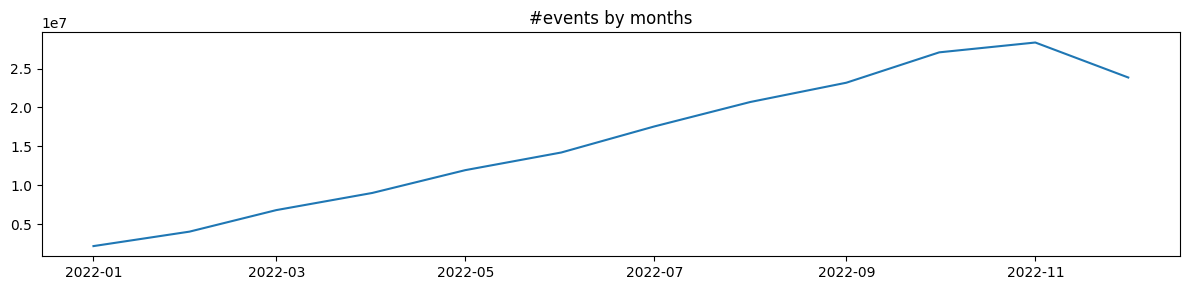

In [13]:
# 2.6. Построим График кол-ва прослушаваний в каждом месяце

fig, ax = plt.subplots(1, 1, figsize=(12, 3))

ax.plot(interactions_by_month["started_at_month"], interactions_by_month["events"])
ax.set_title("#events by months")

fig.tight_layout()
plt.show()

In [14]:
# 2.7. Распределение по месяцам по уникальным пользователям
interactions_by_month = interactions.groupby("started_at_month").agg(users=("user_id", "nunique")).reset_index()

In [15]:
# 2.8 Выведем кол-во униакльных пользователей в каждом месяце
interactions_by_month

,started_at_month,users
0,2022-01-01,48902
1,2022-02-01,90824
2,2022-03-01,136398
3,2022-04-01,180202
4,2022-05-01,224377
5,2022-06-01,265847
6,2022-07-01,307185
7,2022-08-01,346133
8,2022-09-01,378605
9,2022-10-01,403595


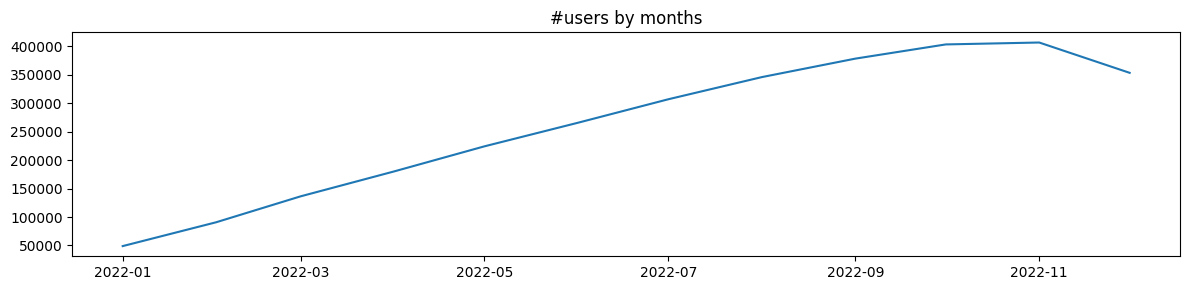

In [16]:
# 2.9. График кол-ва униакльных пользователей в каждом месяце

fig, ax = plt.subplots(1, 1, figsize=(12, 3))

ax.plot(interactions_by_month["started_at_month"], interactions_by_month["users"])
ax.set_title("#users by months")

fig.tight_layout()
plt.show()

Наиболее популярные треки

In [17]:
# 2.10. Покажем распределение популярности треков у пользователей (количество прослушавщих их пользователей)
result = interactions.groupby('track_id').agg({'user_id':'count'}).sort_values('user_id', ascending=False).reset_index()
print(result)

        track_id  user_id
0          53404    83634
1         178529    75770
2       33311009    71983
3       60292250    64790
4       35505245    63881
...          ...      ...
980259  45496696        1
980260  42007144        1
980261  42007179        1
980262  42007212        1
980263  42007110        1

[980264 rows x 2 columns]


/home/mle-user/mle_projects/mle-recsys-project-start/env_recsys_start/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mle-user/mle_projects/mle-recsys-project-start/env_recsys_start/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


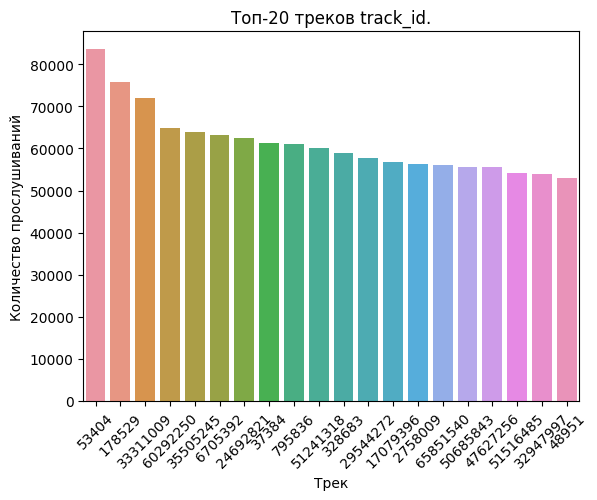

In [18]:
# 2.11. Построим график популярности треков
x = 'track_id'
y = 'user_id'
sns.barplot(data=result.head(20), x=x, y=y, order=result['track_id'].head(20).tolist())

# Добавление заголовка и отображение графика
plt.title(f"Топ-20 треков {x}.")
plt.xlabel('Трек')
plt.xticks(rotation=45) 
plt.ylabel('Количество прослушиваний')
plt.show()

Наиболее популярные жанры

In [ ]:
# Проанализируем, какие жанры наиболее популярны
# Объединяем DataFrame по track_id
merged = interactions.merge(tracks, on="track_id", how="left")

# Разворачиваем список жанров в отдельные строки
all_genres = merged["genres"].explode()

# Считаем частоту каждого жанра
genre_counts = all_genres.value_counts()

# Выбираем топ-20 популярных жанров
top_20_genres = genre_counts.head(20)

print(top_20_genres)

Треки, которые никто не прослушал

In [ ]:
print(interactions.nunique())
# 477033 уникальных пользователей (изначально было 1,4 млн.)
# 980 264 уникальных треков (изначально был 1 млн.)
# Треков, которые никто не слушал НЕТ!

user_id             477033
track_id            980264
track_seq            16637
started_at             365
started_at_month        12
dtype: int64


In [15]:
# Добавим статистику, сколько треков в среднем слушают пользователи

# Считаем количество уникальных треков, прослушанных каждым пользователем
user_track_counts = interactions.groupby('user_id')['track_id'].nunique()

# Вычисляем среднее количество треков на пользователя
average_tracks_per_user = user_track_counts.mean()

print(f"Среднее количество треков, слушаемых каждым пользователем: {average_tracks_per_user:.2f}")

Среднее количество треков, слушаемых каждым пользователем: 161.85


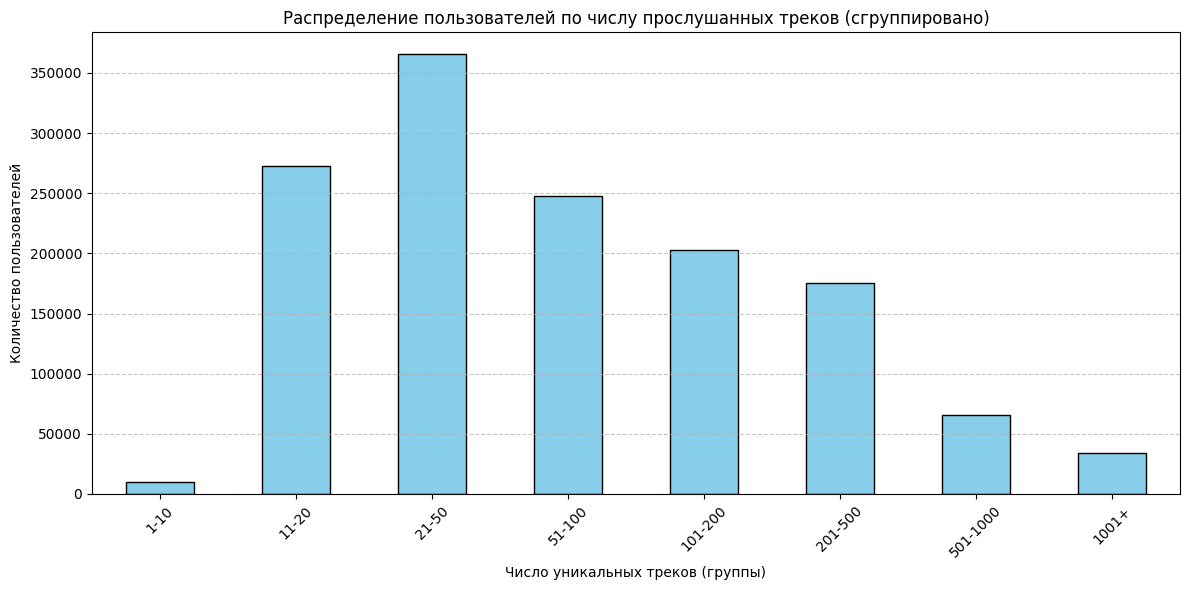

In [17]:
# Добавим визуализацию распределения количества пользователей в зависимости от числа прослушенных треков
# Группировка данных для визуализации
bins = [0, 10, 20, 50, 100, 200, 500, 1000, user_track_counts.max()]
labels = ['1-10', '11-20', '21-50', '51-100', '101-200', '201-500', '501-1000', f'1001+']
user_track_counts_binned = pd.cut(user_track_counts, bins=bins, labels=labels, right=False)

distribution = user_track_counts_binned.value_counts().sort_index()

# Визуализация распределения количества пользователей в зависимости от числа прослушанных треков
plt.figure(figsize=(12, 6))
distribution.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Распределение пользователей по числу прослушанных треков (сгруппировано)')
plt.xlabel('Число уникальных треков (группы)')
plt.ylabel('Количество пользователей')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Выводы:
1. Количество пользователей стабильно росло из месяца в месяц вплоть до ноября 2022 года. В декабре произошло снижение кол-ва пользователей.
2. Количество прослушиваний также стабильно росло из месяца в месяц вплоть до ноября 2022 года. В декабре также произошло снижение.
3. В среднем пользователи прослушали 162 трека.
3. Большая часть пользователей (около 65%) прослушала менее 100 треков. Их мы исключими в целях экономии ресурсов.
4. Супер активных пользователей (более 1000 треков) около 40к (3%)
5. Топ-20 самых популярных треков прослушивали более 55к раз.

Гипотезы:
1. Цель EDA отобрать из всей выборки взаимодействий наиболее релевантные, которые повысят точность предсказаний. Поэтому объем выборки взаимодействий был уменьшен с 222м до 188м, когда мы оставили только тех пользователей, которые проявляли наибольшую активность на сервисе и наиболее полезны для генерации коллаборативных рекомендаций. Кол-во пользователей снизилось после отбора с 1377к до 896к (на 65%).
2. Также часто имеет смысл ограничить выборки по временному принципу, исключив какие-то нетипичные периоды. Однако в ходе проведения EDA таких переодов обнаружено не было. Кол-во прослушиваний и пользователей стабильно росло в каждом месяце кроме последнего. Поэтому для моделирования была оставлена полная выборка по времени.
3. Из данных был исключен небольшой процент данных с неполными параментрами (неизвестные артисты, жанры или названия). Но таких треков оказалось совсем немного, из общей выборки треков осталось не 1000к, а 980к. Ушло около 20к треков. Кол-во взаимодействий сократилось совсем на чуть-чуть, так как видимо это были совсем непопулярные треки.
4. Треков, которых вообще никто не слушал не было выяснено, поэтому сделано предположение о том, что выборка вполне релевантая и все треки могут быть использованы в моделировании.

# Преобразование данных

Преобразуем данные в формат, более пригодный для дальнейшего использования в расчётах рекомендаций.

In [20]:
items = tracks.copy()
events = interactions.copy()

In [22]:
del tracks
del interactions

In [23]:
# Переименуем колонки
events = events.rename(columns={'track_id': 'item_id'})
items = items.rename(columns={'track_id': 'item_id'})
print(events.shape)
print(items.shape)

(188885672, 5)
(980970, 4)


# Сохранение данных

Сохраним данные в двух файлах в персональном S3-бакете по пути `recsys/data/`:
- `items.parquet` — все данные о музыкальных треках,
- `events.parquet` — все данные о взаимодействиях.

In [24]:
import os
import boto3
from dotenv import load_dotenv

load_dotenv()
S3_ENDPOINT_URL = "https://storage.yandexcloud.net"
AWS_ACCESS_KEY_ID = os.getenv("AWS_ACCESS_KEY_ID")
AWS_SECRET_ACCESS_KEY = os.getenv("AWS_SECRET_ACCESS_KEY")
S3_BUCKET_NAME = os.getenv("S3_BUCKET_NAME")

s3_client = boto3.client(
    "s3",
    endpoint_url=S3_ENDPOINT_URL,
    aws_access_key_id=AWS_ACCESS_KEY_ID,
    aws_secret_access_key=AWS_SECRET_ACCESS_KEY,
)

In [25]:
# Сохраняем items
buffer = io.BytesIO()
items.to_parquet(buffer, index=False)
buffer.seek(0)

# Путь к файлу на S3
s3_key = "recsys/data/items.parquet"
bucket_name = S3_BUCKET_NAME

# Загружаем файл на S3
s3_client.put_object(
    Bucket=bucket_name,
    Key=s3_key,
    Body=buffer
)

print(f"Файл успешно сохранен на S3 по пути: {s3_key}")


Файл успешно сохранен на S3 по пути: recsys/data/items.parquet


In [26]:
# Сохраняем events
buffer = io.BytesIO()
events.to_parquet(buffer, index=False)
buffer.seek(0)

# Путь к файлу на S3
s3_key = "recsys/data/events.parquet"
bucket_name = S3_BUCKET_NAME

# Загружаем файл на S3
s3_client.put_object(
    Bucket=bucket_name,
    Key=s3_key,
    Body=buffer
)

print(f"Файл успешно сохранен на S3 по пути: {s3_key}")

Файл успешно сохранен на S3 по пути: recsys/data/events.parquet


# Очистка памяти

Здесь, может понадобится очистка памяти для высвобождения ресурсов для выполнения кода ниже. 

Приведите соответствующие код, комментарии, например:
- код для удаление более ненужных переменных,
- комментарий, что следует перезапустить kernel, выполнить такие-то начальные секции и продолжить с этапа 3.

In [27]:
import gc
# Удаляем ненужные переменные
del items
del events
# Очищаем память с помощью сборщика мусора
gc.collect()
print("Память очищена. Если возникнут проблемы с памятью, рекомендуется перезапустить kernel.")

Память очищена. Если возникнут проблемы с памятью, рекомендуется перезапустить kernel.


<b>Комментарий от ревьюера v1</b>

<div class="alert alert-block alert-success">
✔️ EDA проведен, отлично!
</div>

<div class="alert alert-warning">
⚠️ Не хватает распределения количества пользователей в зависимости от числа прослушенных треков (да и статистики сколько каждый пользователь в среднем слушает треков).
</div>   
    
<div class="alert alert-block alert-danger">
❌ После EDA хотелось бы видеть выводы и выдвинутые гипотезы, которые можно проверить при моделировании. Ведь в этом ценность EDA.
</div>
<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> 
<br>- добавлена статистика
<br>- добавлена визуализация
<br>- добавлены выводы
<br>- выдвинуты гипотезы
</div>

# === ЭТАП 3 ===

# Загрузка данных

Если необходимо, то загружаем items.parquet, events.parquet.

In [29]:
import os
import io
import boto3
import pandas as pd
from dotenv import load_dotenv

load_dotenv()

S3_ENDPOINT_URL = "https://storage.yandexcloud.net"
AWS_ACCESS_KEY_ID = os.getenv("AWS_ACCESS_KEY_ID")
AWS_SECRET_ACCESS_KEY = os.getenv("AWS_SECRET_ACCESS_KEY")
S3_BUCKET_NAME = os.getenv("S3_BUCKET_NAME")

s3_client = boto3.client(
    "s3",
    endpoint_url=S3_ENDPOINT_URL,
    aws_access_key_id=AWS_ACCESS_KEY_ID,
    aws_secret_access_key=AWS_SECRET_ACCESS_KEY,
)

# Функция для загрузки данных из S3
def load_parquet_from_s3(s3_client, bucket_name, s3_key):
    buffer = io.BytesIO()
    s3_client.download_fileobj(Bucket=bucket_name, Key=s3_key, Fileobj=buffer)
    buffer.seek(0)
    return pd.read_parquet(buffer)

items = load_parquet_from_s3(s3_client, S3_BUCKET_NAME, "recsys/data/items.parquet")
print(items.shape)

events = load_parquet_from_s3(s3_client, S3_BUCKET_NAME, "recsys/data/events.parquet")
print(events.shape)

(980970, 4)
(188885672, 5)


# Разбиение данных

Разбиваем данные на тренировочную, тестовую выборки.

In [30]:
import logging

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline
%config InlineBackend.figure_format = 'png'
%config InlineBackend.figure_format = 'retina'

In [32]:
# 3.1 Разделим данные на две выборки: train и test
# зададим точку разбиения
train_test_global_time_split_date = pd.to_datetime("2022-12-16")

train_test_global_time_split_idx = events["started_at"] < train_test_global_time_split_date
events_train = events[train_test_global_time_split_idx]
events_test = events[~train_test_global_time_split_idx]
print(events_train.shape, events_test.shape)

# количество пользователей в train и test
users_train = events_train["user_id"].drop_duplicates()
users_test = events_test["user_id"].drop_duplicates()
# количество пользователей, которые есть и в train, и в test

# Преобразуем уникальные идентификаторы пользователей в множества
train_set = set(users_train)
test_set = set(users_test)

# Найдем пересечение множеств
common_users = train_set.intersection(test_set)

# Количество общих пользователей
num_common_users = len(common_users)

print(f"Количество общих пользователей: {num_common_users}")

print(len(users_train), len(users_test), len(common_users))

(178811394, 5) (10074278, 5)
Количество общих пользователей: 279171
475751 280453 279171


<b>Комментарий от ревьюера v1</b>

<div class="alert alert-block alert-success">
    
✔️ Отлично, выборки train / test сформированы. 

Выборки train / test можно получать несколькими способами (см. картинку ниже)
</div>


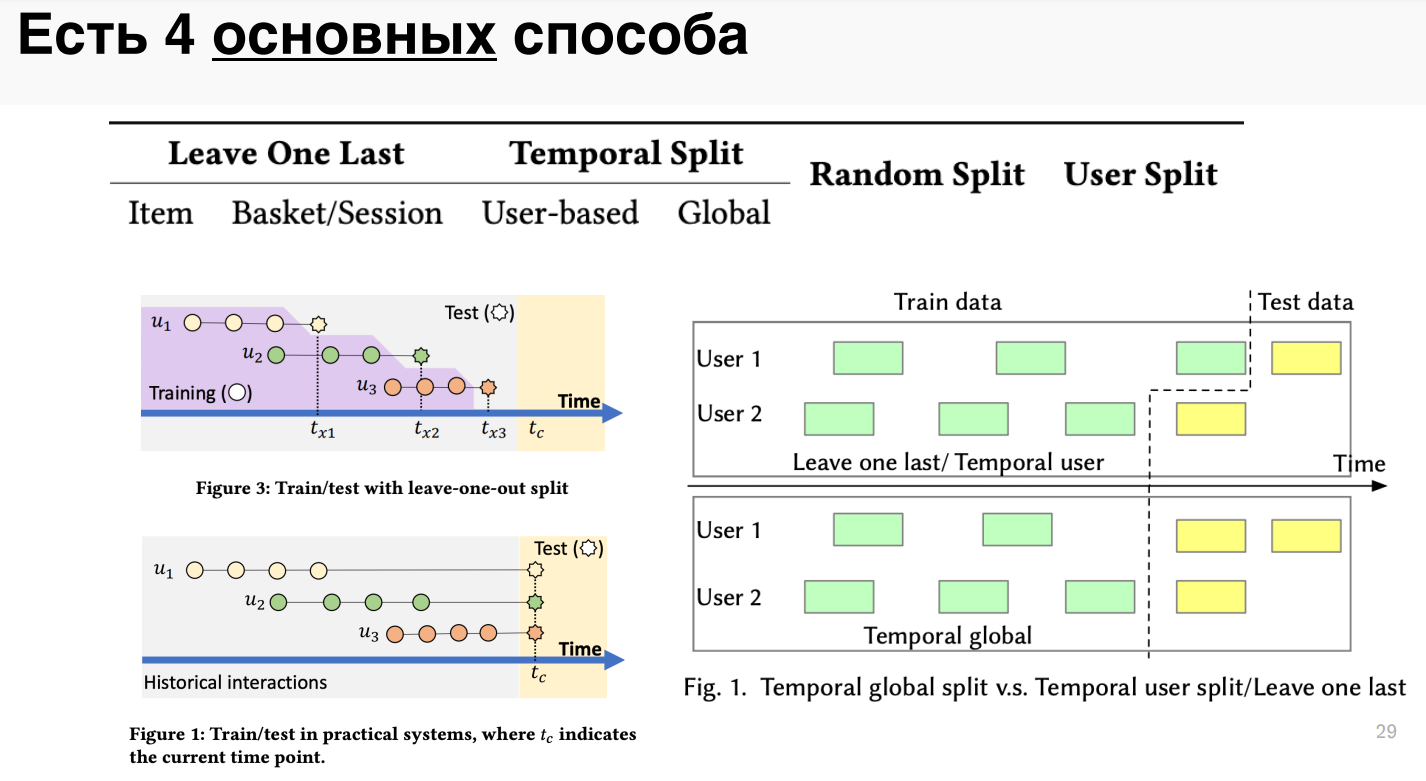

[Ссылка на картинку](https://disk.yandex.ru/i/L6hBTf6KLYRa-g)

# Топ популярных

Рассчитаем рекомендации как топ популярных.

In [33]:
# 3.2 Определим количество холодных юзеров
cold_users = test_set - common_users

print(len(cold_users))

1282


<b>Комментарий от ревьюера v1</b>

<div class="alert alert-block alert-success">
    
✔️ КОрректно!
</div>

In [34]:
# 3.3. Рекомендации для холодных. 
# Найдем топ-100 наиболее популярных треков
item_popularity = events_train.groupby(["item_id"]).agg(users=("user_id", "nunique")).reset_index()
print(item_popularity)

# сортируем по убыванию количества проислушиваний
item_popularity = item_popularity.sort_values('users', ascending=False)

# выбираем первые 100 айтемов
top_k_pop_items = item_popularity.head(100)
print(top_k_pop_items)

          item_id  users
0              26      5
1              38      5
2             135     15
3             136      7
4             138     14
...           ...    ...
979541  101478482      2
979542  101490148     17
979543  101493057      4
979544  101495927      6
979545  101521819     13

[979546 rows x 2 columns]
         item_id  users
9091       53404  83493
26635     178529  75616
481379  33311009  69608
509539  35505245  62651
196451   6705392  62552
...          ...    ...
1534        7786  36097
583848  40548548  35773
76764     679169  35579
835180  68348389  35486
741791  56920237  35481

[100 rows x 2 columns]


In [ ]:
# 3.4 Определим, для какой доли событий «холодных» пользователей в events_test рекомендации в top_k_pop_items совпали?
cold = events_test[events_test["user_id"].isin(cold_users)]
print(f'События холодных пользователей - {cold.shape[0]}')

test_users = cold['user_id'].nunique()
print(f'Количество уникальных пользователей - {test_users}')

cold_users_events_with_recs = cold.merge(top_k_pop_items, on="item_id", how="left")
cold_user_items_no_avg_rating_idx = cold_users_events_with_recs["users"].isnull()

cold_user_items_no_avg_rating_count = cold_user_items_no_avg_rating_idx.sum()
print(f'Количество пропущенных значений - {cold_user_items_no_avg_rating_count}')

cold_user_recs = cold_users_events_with_recs[~cold_user_items_no_avg_rating_idx] \
    [["user_id", "item_id", "users"]]
print(f'Количество совпадающих значений - {cold_user_recs.shape[0]}')

# Определим долю хол. пользователей, для которых совпали рекомендации:
result = cold_user_recs.shape[0] / cold.shape[0]
print(f'Доля событий, для которых совпали рекомендации {result}')

События холодных пользователей - 149043
Количество уникальных пользователей - 1282
Количество пропущенных значений - 142112
Количество совпадающих значений - 6931
Доля событий, для которых совпали рекомендации 0.04650335809128909


In [60]:
# 3.5 посчитаем покрытие холодных пользователей рекомендациями
cold_users = len(cold.groupby("user_id"))
print('Холодных пользователей, всего', cold_users)
cold_users_hit_ratio = cold_users_events_with_recs[cold_users_events_with_recs['users'].notna()].groupby("user_id").size()
unique_users = len(cold_users_hit_ratio)
print('Холодных пользователей с рекомендациями', unique_users)

print(f"Доля пользователей c релевантными рекомендациями: {unique_users/cold_users}")


Холодных пользователей, всего 1282
Холодных пользователей с рекомендациями 1088
Доля пользователей c релевантными рекомендациями: 0.8486739469578783


In [61]:
# 3.6 Сохраняем рекомендации:
# Сохраняем events
buffer = io.BytesIO()
top_k_pop_items.to_parquet(buffer, index=False)
buffer.seek(0)

# Путь к файлу на S3
s3_key = "recsys/recommendations/top_popular.parquet"
bucket_name = S3_BUCKET_NAME

# Загружаем файл на S3
s3_client.put_object(
    Bucket=bucket_name,
    Key=s3_key,
    Body=buffer
)

print(f"Файл успешно сохранен на S3 по пути: {s3_key}")

Файл успешно сохранен на S3 по пути: recsys/recommendations/top_popular.parquet


<b>Комментарий от ревьюера v1</b>

<div class="alert alert-block alert-success">
✔️ Отлично, неперсональные рекомендации сформированы!
</div>

# Персональные

Рассчитаем персональные рекомендации.

In [62]:
# 4.1. Перекодируем идентификаторы
import scipy
import sklearn.preprocessing

# перекодируем идентификаторы пользователей: 
# из имеющихся в последовательность 0, 1, 2, ...
user_encoder = sklearn.preprocessing.LabelEncoder()
user_encoder.fit(events["user_id"])
events_train["user_id_enc"] = user_encoder.transform(events_train["user_id"])
events_test["user_id_enc"] = user_encoder.transform(events_test["user_id"])

# перекодируем идентификаторы объектов: 
# из имеющихся в последовательность 0, 1, 2, ...
item_encoder = sklearn.preprocessing.LabelEncoder()
item_encoder.fit(items["item_id"])
items["item_id_enc"] = item_encoder.transform(items["item_id"])
events_train["item_id_enc"] = item_encoder.transform(events_train["item_id"])
events_test["item_id_enc"] = item_encoder.transform(events_test["item_id"])

/tmp/ipykernel_73422/1837707211.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_train["user_id_enc"] = user_encoder.transform(events_train["user_id"])
/tmp/ipykernel_73422/1837707211.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_test["user_id_enc"] = user_encoder.transform(events_test["user_id"])
/tmp/ipykernel_73422/1837707211.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

980969
980969


/tmp/ipykernel_73422/1837707211.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_test["item_id_enc"] = item_encoder.transform(events_test["item_id"])


In [63]:
# 4.2 Вычислим размер матрицы
x = events_train['item_id_enc'].nunique()
print(x)
y = events_train['user_id_enc'].nunique()
print(y)
r = ((x * y) / 1024 ** 3)
print(r)

979546
475751
434.0149360205978


In [64]:
# 4.3. создаём sparse-матрицу формата CSR 
user_item_matrix_train = scipy.sparse.csr_matrix((
    np.ones(len(events_train), dtype=np.int8),  # Значения: 1 для каждой пары
    (events_train['user_id_enc'], events_train['item_id_enc'])),
    dtype=np.int8)
print('Матрица создана!')

Матрица создана!


In [65]:
# 4.4. Определим потребление ОП для sparce-матрицы
import sys

sum([sys.getsizeof(i) for i in user_item_matrix_train.data])/1024**3

4.163277195766568

In [66]:
# 4.5. Создадим и натренируем модель
from implicit.als import AlternatingLeastSquares

als_model = AlternatingLeastSquares(factors=50, iterations=50, regularization=0.05, random_state=0)
als_model.fit(user_item_matrix_train)

/home/mle-user/mle_projects/mle-recsys-project-start/env_recsys_start/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/mle-user/mle_projects/mle-recsys-project-start/env_recsys_start/lib/python3.10/site-packages/implicit/cpu/als.py:95: RuntimeWarning: OpenBLAS is configured to use 4 threads. It is highly recommended to disable its internal threadpool by setting the environment variable 'OPENBLAS_NUM_THREADS=1' or by calling 'threadpoolctl.threadpool_limits(1, "blas")'. Having OpenBLAS use a threadpool can lead to severe performance issues here.
  check_blas_config()
100%|██████████| 50/50 [36:26<00:00, 43.72s/it]


In [67]:
# 4.6 Получим рекомендации
def get_recommendations_als(user_item_matrix, model, user_id, user_encoder, item_encoder, include_seen=True, n=5):
    """
    Возвращает отранжированные рекомендации для заданного пользователя
    """
    user_id_enc = user_encoder.transform([user_id])[0]
    recommendations = model.recommend(
         user_id_enc, 
         user_item_matrix[user_id_enc], 
         filter_already_liked_items=not include_seen,
         N=n)
    recommendations = pd.DataFrame({"item_id_enc": recommendations[0], "score": recommendations[1]})
    recommendations["item_id"] = item_encoder.inverse_transform(recommendations["item_id_enc"])
    
    return recommendations

In [68]:
# 4.7. ПОЛУЧИМ РЕКОМЕНДАЦИИ ДЛЯ ВСЕХ ПОЛЬЗОВАТЕЛЕЙ
# получаем список всех возможных user_id (перекодированных)
user_ids_encoded = range(len(user_encoder.classes_))

# получаем рекомендации для всех пользователей
als_recommendations = als_model.recommend(
    user_ids_encoded, 
    user_item_matrix_train[user_ids_encoded], 
    filter_already_liked_items=False, N=100)

# преобразуем полученные рекомендации в табличный формат
item_ids_enc = als_recommendations[0]
als_scores = als_recommendations[1]

als_recommendations = pd.DataFrame({
    "user_id_enc": user_ids_encoded,
    "item_id_enc": item_ids_enc.tolist(), 
    "score": als_scores.tolist()})
als_recommendations = als_recommendations.explode(["item_id_enc", "score"], ignore_index=True)

# приводим типы данных
als_recommendations["item_id_enc"] = als_recommendations["item_id_enc"].astype("int")
als_recommendations["score"] = als_recommendations["score"].astype("float")

# получаем изначальные идентификаторы
als_recommendations["user_id"] = user_encoder.inverse_transform(als_recommendations["user_id_enc"])
als_recommendations["item_id"] = item_encoder.inverse_transform(als_recommendations["item_id_enc"])
als_recommendations = als_recommendations.drop(columns=["user_id_enc", "item_id_enc"])

als_recommendations = als_recommendations[["user_id", "item_id", "score"]]
print(als_recommendations.head(5))

   user_id   item_id     score
0        4  18820599  0.201269
1        4    694683  0.194737
2        4    647040  0.189356
3        4       986  0.182152
4        4    679169  0.176156


In [69]:
# 4.8 Сохраняем рекомендации:
buffer = io.BytesIO()
als_recommendations.to_parquet(buffer, index=False)
buffer.seek(0)

# Путь к файлу на S3
s3_key = "recsys/recommendations/personal_als.parquet"
bucket_name = S3_BUCKET_NAME

# Загружаем файл на S3
s3_client.put_object(
    Bucket=bucket_name,
    Key=s3_key,
    Body=buffer
)

print(f"Файл успешно сохранен на S3 по пути: {s3_key}")

Файл успешно сохранен на S3 по пути: recsys/recommendations/personal_als.parquet


In [71]:
als_recommendations.shape

(47703300, 3)

# Похожие

Рассчитаем похожие, они позже пригодятся для онлайн-рекомендаций.

In [15]:
import logging

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline
%config InlineBackend.figure_format = 'png'
%config InlineBackend.figure_format = 'retina'

In [16]:
# 4.1 Загружаем данные
import os
import io
import boto3
import pandas as pd
from dotenv import load_dotenv

load_dotenv()

S3_ENDPOINT_URL = "https://storage.yandexcloud.net"
AWS_ACCESS_KEY_ID = os.getenv("AWS_ACCESS_KEY_ID")
AWS_SECRET_ACCESS_KEY = os.getenv("AWS_SECRET_ACCESS_KEY")
S3_BUCKET_NAME = os.getenv("S3_BUCKET_NAME")

s3_client = boto3.client(
    "s3",
    endpoint_url=S3_ENDPOINT_URL,
    aws_access_key_id=AWS_ACCESS_KEY_ID,
    aws_secret_access_key=AWS_SECRET_ACCESS_KEY,
)

# Функция для загрузки данных из S3
def load_parquet_from_s3(s3_client, bucket_name, s3_key):
    buffer = io.BytesIO()
    s3_client.download_fileobj(Bucket=bucket_name, Key=s3_key, Fileobj=buffer)
    buffer.seek(0)
    return pd.read_parquet(buffer)

items = load_parquet_from_s3(s3_client, S3_BUCKET_NAME, "recsys/data/items.parquet")
print(items.shape)

events = load_parquet_from_s3(s3_client, S3_BUCKET_NAME, "recsys/data/events.parquet")
print(events.shape)

(980970, 4)
(188885672, 5)


In [17]:
# 4.2 Разделим данные на две выборки: train и test
# зададим точку разбиения
train_test_global_time_split_date = pd.to_datetime("2022-12-16")

train_test_global_time_split_idx = events["started_at"] < train_test_global_time_split_date
events_train = events[train_test_global_time_split_idx]
events_test = events[~train_test_global_time_split_idx]
print(events_train.shape, events_test.shape)

# количество пользователей в train и test
users_train = events_train["user_id"].drop_duplicates()
users_test = events_test["user_id"].drop_duplicates()
# количество пользователей, которые есть и в train, и в test

(178811394, 5) (10074278, 5)


In [18]:
# 4.3. Перекодируем идентификаторы
import scipy
import sklearn.preprocessing

# перекодируем идентификаторы пользователей: 
# из имеющихся в последовательность 0, 1, 2, ...
user_encoder = sklearn.preprocessing.LabelEncoder()
user_encoder.fit(events["user_id"])
events_train["user_id_enc"] = user_encoder.transform(events_train["user_id"])
events_test["user_id_enc"] = user_encoder.transform(events_test["user_id"])

# перекодируем идентификаторы объектов: 
# из имеющихся в последовательность 0, 1, 2, ...
item_encoder = sklearn.preprocessing.LabelEncoder()
item_encoder.fit(items["item_id"])
items["item_id_enc"] = item_encoder.transform(items["item_id"])
events_train["item_id_enc"] = item_encoder.transform(events_train["item_id"])
events_test["item_id_enc"] = item_encoder.transform(events_test["item_id"])

/tmp/ipykernel_3574/1094988590.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_train["user_id_enc"] = user_encoder.transform(events_train["user_id"])
/tmp/ipykernel_3574/1094988590.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_test["user_id_enc"] = user_encoder.transform(events_test["user_id"])
/tmp/ipykernel_3574/1094988590.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

In [5]:
print(items.head(4))

   item_id              albums artists    genres  item_id_enc
0       26        [3, 2490753]    [16]  [11, 21]            0
1       38        [3, 2490753]    [16]  [11, 21]            1
2      135  [12, 214, 2490809]    [84]      [11]            2
3      136  [12, 214, 2490809]    [84]      [11]            3


In [19]:
# 4.4 Извлечем список уникальных жанров
def get_genres(items):
    """
    Извлекает список уникальных жанров из датафрейма items.
    """
    genres = set()
    for genre_list in items['genres']:
        genres.update(genre_list)
    return sorted(genres)

genres = get_genres(items)
print(genres)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 35, 37, 38, 39, 40, 41, 43, 44, 45, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 79, 80, 84, 85, 86, 87, 88, 89, 90, 92, 94, 95, 97, 98, 99, 101, 102, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 120, 121, 123, 127, 128, 138, 190, 227, 246, 300, 308, 319, 325, 332, 335, 383, 415, 432, 489, 610, 702, 703, 743, 762, 849, 923, 1016, 1182, 1197, 1484, 1542]


In [20]:
# 4.5 Создаем матрицу соответствия объектов жанрам.
def get_item2genre_matrix(genres, items):
    """
    Создает csr-матрицу соответствия объектов жанрам.
    """
    genre_index = {genre: idx for idx, genre in enumerate(genres)}
    
    row_indices = []
    col_indices = []
    data = []

    for row_idx, genre_list in enumerate(items['genres']):
        for genre in genre_list:
            row_indices.append(row_idx)
            col_indices.append(genre_index[genre])
            data.append(1)

    matrix = scipy.sparse.csr_matrix((data, (row_indices, col_indices)), shape=(len(items), len(genres)))
    return matrix

all_items_genres_csr = get_item2genre_matrix(genres, items)
print(all_items_genres_csr.shape)

(980970, 136)


In [8]:
items.head(2)
items.shape

(980970, 5)

In [9]:
events_train.head(2)
events_train.shape

(178811394, 7)

In [21]:
# 4.6 Получем описанную матрицу для выбранного пользователя
user_id = 4
user_events = events_train.query("user_id == @user_id")["item_id_enc"]
print(user_events.shape)
print(user_events.head(5))
user_items = items[items["item_id_enc"].isin(user_events)]
print(user_items.head(5))

user_items_genres_csr = get_item2genre_matrix(genres, user_items)
user_items_genres_csr

(243,)
0      93
1     880
2    1961
3    1965
4    3358
Name: item_id_enc, dtype: int64
      item_id                                             albums  artists  \
93        966  [87, 1889, 5157, 6041, 7054, 37070, 90984, 271...    [798]   
880      4094  [409, 422, 56804, 91241, 1165264, 3826520, 402...   [3276]   
1961     9760  [977, 4167, 8027, 8041, 85617, 89635, 89668, 1...   [7147]   
1965     9769  [977, 2463, 3298, 4029, 4167, 8027, 8041, 8316...   [7147]   
3358    18392             [1597, 5334, 90410, 9765609, 13184923]  [11171]   

             genres  item_id_enc  
93        [14, 102]           93  
880        [38, 47]          880  
1961      [59, 102]         1961  
1965  [14, 59, 102]         1965  
3358           [47]         3358  


<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 419 stored elements and shape (243, 136)>

In [22]:
# 4.7 вычислим склонность пользователя к жанрам
from collections import Counter

def calculate_genre_preferences(user_items):
    """
    Рассчитывает склонность пользователя к жанрам на основе взаимодействий с элементами.
    """
    # Считаем частоту жанров
    all_genres = [genre for genres_list in user_items['genres'] for genre in genres_list]
    genre_counts = Counter(all_genres)
    
    # Рассчитываем общую сумму жанров
    total_genres = sum(genre_counts.values())
    
    # Создаем датафрейм с распределением жанров
    genre_preferences = pd.DataFrame({
        'genre': list(genre_counts.keys()),
        'count': list(genre_counts.values())
    })
    
    # Добавляем колонку с нормализованным распределением
    genre_preferences['preference'] = genre_preferences['count'] / total_genres
    
    return genre_preferences.sort_values(by='preference', ascending=False)

# Рассчитываем склонность пользователя к жанрам
user_genre_preferences = calculate_genre_preferences(user_items)
print(user_genre_preferences.head(5))

   genre  count  preference
1    102     73    0.174224
6     75     46    0.109785
0     14     44    0.105012
5     44     36    0.085919
4     59     23    0.054893


In [23]:
# 4.7 Преобразуем предпочтения пользователя в вектор
def create_user_preference_vector(genres, user_genre_preferences):
    """
    Преобразует предпочтения пользователя в вектор с размерностью, равной числу жанров.
    """
    genre_to_index = {genre: idx for idx, genre in enumerate(genres)}
    user_vector = np.zeros(len(genres))
    
    for _, row in user_genre_preferences.iterrows():
        genre = row['genre']
        preference = row['preference']
        if genre in genre_to_index:
            user_vector[genre_to_index[genre]] = preference
    
    return user_vector

# Преобразуем user_genre_preferences в вектор
user_preference_vector = create_user_preference_vector(genres, user_genre_preferences)
user_preference_vector = user_preference_vector.reshape(1, -1)
print(user_preference_vector.shape)


(1, 136)


In [24]:
# 4.8 Получим наиболее релевантные рекомендации для пользователя
from sklearn.metrics.pairwise import cosine_similarity

# вычисляем сходство между вектором пользователя и векторами по трекам
similarity_scores = cosine_similarity(all_items_genres_csr, user_preference_vector)

# преобразуем в одномерный массив
similarity_scores = similarity_scores.flatten()

# получаем индексы top-k (по убыванию значений), по сути, индексы треков (encoded)
k = 100
top_k_indices = np.argsort(similarity_scores)[-k:][::-1]

selected_items = items[items["item_id_enc"].isin(top_k_indices)]
print(selected_items.head(5))

      item_id                                             albums artists  \
1587     8105  [842, 3717, 3957, 10663, 67324, 2498162, 44184...  [2610]   
2598    13109                             [1245, 1534, 14030844]  [9105]   
2603    13114                             [1245, 1534, 14030844]  [9105]   
2606    13117                             [1245, 1534, 14030844]  [9105]   
2608    13119        [1245, 1532, 1534, 1929, 6929535, 11612448]  [9105]   

                     genres  item_id_enc  
1587  [14, 44, 74, 75, 102]         1587  
2598      [14, 44, 75, 102]         2598  
2603      [14, 44, 75, 102]         2603  
2606      [14, 44, 75, 102]         2606  
2608      [14, 44, 75, 102]         2608  


In [25]:
# 4.9 Вычислим рекомендации для всех пользователей

def generate_recommendations_for_all_users(events_train, items, genres, k=100):
    # Словарь для хранения рекомендаций
    recommendations = {}
    
    # Получаем уникальных пользователей
    user_ids = events_train["user_id"].unique()

    # Выберем первые 10000 уникальных пользователей для расчета рекомендаций (на всех считать очень долго)
    user_ids = events_train["user_id"].unique()[:10000]
    events_train = events_train[events_train["user_id"].isin(user_ids)]

    
    for user_id in user_ids:
        # Получаем события для текущего пользователя
        user_events = events_train.query("user_id == @user_id")["item_id_enc"]
        
        # Фильтруем треки пользователя
        user_items = items[items["item_id_enc"].isin(user_events)]
        
        # Рассчитываем предпочтения пользователя
        user_genre_preferences = calculate_genre_preferences(user_items)
        user_preference_vector = create_user_preference_vector(genres, user_genre_preferences)
        # Преобразуем вектор в двумерный массив
        user_preference_vector_reshaped = user_preference_vector.reshape(1, -1)
        
        # Рассчитываем сходство
        similarity_scores = cosine_similarity(all_items_genres_csr, user_preference_vector_reshaped)
        similarity_scores = similarity_scores.flatten()
        
        # Получаем топ-k индексов
        top_k_indices = np.argsort(similarity_scores)[-k:][::-1]
        
        # Сохраняем рекомендации
        recommendations[user_id] = list(items[items["item_id_enc"].isin(top_k_indices)]["item_id_enc"])
    
    return recommendations

content_recommendations = generate_recommendations_for_all_users(
    events_train, items, genres, k=100)

# Создание DataFrame с сохранением списка рекомендаций в одной ячейке
recommendations_df = pd.DataFrame({
    "user_id": content_recommendations.keys(),
    "recommended_items": content_recommendations.values()
})

print(recommendations_df.head(5))
recommendations_df.columns = ["user_id", "recommended_items"]
recommendations_df["recommended_items"] = recommendations_df["recommended_items"].apply(lambda x: list(x) if not isinstance(x, list) else x)

# Сохраняем
buffer = io.BytesIO()
recommendations_df.to_parquet(buffer, index=False)
buffer.seek(0)

# Путь к файлу на S3
s3_key = "recsys/recommendations/similar.parquet"
bucket_name = S3_BUCKET_NAME

# Загружаем файл на S3
s3_client.put_object(
    Bucket=bucket_name,
    Key=s3_key,
    Body=buffer
)

print(f"Файл успешно сохранен на S3 по пути: {s3_key}")

   user_id                                  recommended_items
0        4  [1587, 2598, 2603, 2606, 2608, 3224, 15714, 30...
1       13  [271817, 271818, 271819, 271820, 271821, 27182...
2       14  [235426, 271219, 271265, 271266, 271267, 27126...
3       16  [2124, 5326, 10761, 23012, 30821, 33365, 33554...
4       19  [5453, 5457, 5460, 5488, 5491, 5492, 5494, 549...
Файл успешно сохранен на S3 по пути: recsys/recommendations/similar.parquet


In [27]:
# Проиллюстрируем "похожесть" треков
# Загружаем данные
import os
import io
import boto3
import pandas as pd
from dotenv import load_dotenv

load_dotenv()

S3_ENDPOINT_URL = "https://storage.yandexcloud.net"
AWS_ACCESS_KEY_ID = os.getenv("AWS_ACCESS_KEY_ID")
AWS_SECRET_ACCESS_KEY = os.getenv("AWS_SECRET_ACCESS_KEY")
S3_BUCKET_NAME = os.getenv("S3_BUCKET_NAME")

s3_client = boto3.client(
    "s3",
    endpoint_url=S3_ENDPOINT_URL,
    aws_access_key_id=AWS_ACCESS_KEY_ID,
    aws_secret_access_key=AWS_SECRET_ACCESS_KEY,
)

# Функция для загрузки данных из S3
def load_parquet_from_s3(s3_client, bucket_name, s3_key):
    buffer = io.BytesIO()
    s3_client.download_fileobj(Bucket=bucket_name, Key=s3_key, Fileobj=buffer)
    buffer.seek(0)
    return pd.read_parquet(buffer)

# Загрузим похожие
similar = load_parquet_from_s3(s3_client, S3_BUCKET_NAME, "recsys/recommendations/similar.parquet")
print(similar.shape)
print(similar.head(2))

# Загрузим треки
items = load_parquet_from_s3(s3_client, S3_BUCKET_NAME, "recsys/data/items.parquet")
print(items.shape)
print(items.head(2))

# Загрузим каталог
catalog_names = pd.read_parquet("catalog_names.parquet")
print(catalog_names.shape)
print(catalog_names.head(2))


(10000, 2)
   user_id                                  recommended_items
0        4  [1587, 2598, 2603, 2606, 2608, 3224, 15714, 30...
1       13  [271817, 271818, 271819, 271820, 271821, 27182...


(980970, 4)
   item_id        albums artists    genres
0       26  [3, 2490753]    [16]  [11, 21]
1       38  [3, 2490753]    [16]  [11, 21]
(1812471, 3)
   id   type               name
0   3  album    Taller Children
1  12  album  Wild Young Hearts


In [63]:
# Выведем название композиций. артистов и жанров для наглядности
import sklearn.preprocessing

item_ids = similar.loc[similar['user_id'] == 4, 'recommended_items'].iloc[0][:5]

item_encoder = sklearn.preprocessing.LabelEncoder()
item_encoder.fit(items["item_id"])

for item in item_ids:
    original_item = item_encoder.inverse_transform([item])[0]
    track = items[items['item_id'] == original_item]
    artists = track['artists'].iloc[0]
    genres = track['genres'].iloc[0]

    item_name = catalog_names.loc[(catalog_names['id'] == original_item) & (catalog_names['type'] == 'track'), 'name'].iloc[0]
    print(item_name)
    
    arists_names = []
    for artist in artists:
        artist = catalog_names.loc[(catalog_names['id'] == artist) & (catalog_names['type'] == 'artist'), 'name'].iloc[0]
        arists_names.append(artist)
    print(f'Исполнители: {arists_names}')
    
    genres_names = []
    for genre in genres:
        genre = catalog_names.loc[(catalog_names['id'] == genre) & (catalog_names['type'] == 'genre'), 'name'].iloc[0]
        genres_names.append(genre)
    print(f'Жанры: {genres_names}')


Be Without You
Исполнители: ['Mary J. Blige']
Жанры: ['rock', 'foreignrap', 'rnb', 'rap', 'allrock']
Trumpets
Исполнители: ['FlipSyde']
Жанры: ['rock', 'foreignrap', 'rap', 'allrock']
Flipsyde
Исполнители: ['FlipSyde']
Жанры: ['rock', 'foreignrap', 'rap', 'allrock']
No More
Исполнители: ['FlipSyde']
Жанры: ['rock', 'foreignrap', 'rap', 'allrock']
Someday
Исполнители: ['FlipSyde']
Жанры: ['rock', 'foreignrap', 'rap', 'allrock']


<b>Комментарий от ревьюера v1</b>

<div class="alert alert-block alert-success">
✔️ Похожие треки сформированы.
</div>

<div class="alert alert-warning">
⚠️ Было бы полезно проверить "похожесть" треки на нескольких примерах, визуализировав их.
</div>
<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Сделано.
</div>

# Построение признаков

Построим три признака, можно больше, для ранжирующей модели.

In [1]:
# 5.1 Загружаем данные
import os
import io
import boto3
import pandas as pd
from dotenv import load_dotenv

load_dotenv()

S3_ENDPOINT_URL = "https://storage.yandexcloud.net"
AWS_ACCESS_KEY_ID = os.getenv("AWS_ACCESS_KEY_ID")
AWS_SECRET_ACCESS_KEY = os.getenv("AWS_SECRET_ACCESS_KEY")
S3_BUCKET_NAME = os.getenv("S3_BUCKET_NAME")

s3_client = boto3.client(
    "s3",
    endpoint_url=S3_ENDPOINT_URL,
    aws_access_key_id=AWS_ACCESS_KEY_ID,
    aws_secret_access_key=AWS_SECRET_ACCESS_KEY,
)

# Функция для загрузки данных из S3
def load_parquet_from_s3(s3_client, bucket_name, s3_key):
    buffer = io.BytesIO()
    s3_client.download_fileobj(Bucket=bucket_name, Key=s3_key, Fileobj=buffer)
    buffer.seek(0)
    return pd.read_parquet(buffer)

items = load_parquet_from_s3(s3_client, S3_BUCKET_NAME, "recsys/data/items.parquet")
print(items.shape)

events = load_parquet_from_s3(s3_client, S3_BUCKET_NAME, "recsys/data/events.parquet")
print(events.shape)

popular = load_parquet_from_s3(s3_client, S3_BUCKET_NAME, "recsys/recommendations/top_popular.parquet")
print(popular.shape)
print(popular.head(2))

personal = load_parquet_from_s3(s3_client, S3_BUCKET_NAME, "recsys/recommendations/personal_als.parquet")
print(personal.shape)
print(personal.head(2))

similar = load_parquet_from_s3(s3_client, S3_BUCKET_NAME, "recsys/recommendations/similar.parquet")
print(similar.shape)
print(similar.head(2))


(980970, 4)
(188885672, 5)
(100, 2)
   item_id  users
0    53404  83493
1   178529  75616
(47703300, 3)
   user_id   item_id     score
0        4  18820599  0.201269
1        4    694683  0.194737
(10000, 2)
   user_id                                  recommended_items
0        4  [1587, 2598, 2603, 2606, 2608, 3224, 15714, 30...
1       13  [271817, 271818, 271819, 271820, 271821, 27182...


In [2]:
# 5.2 зададим точку разбиения
train_test_global_time_split_date = pd.to_datetime("2022-12-16")

train_test_global_time_split_idx = events["started_at"] < train_test_global_time_split_date
events_train = events[train_test_global_time_split_idx]
events_test = events[~train_test_global_time_split_idx]
print(events_train.shape, events_test.shape)

(178811394, 5) (10074278, 5)


In [3]:
import sklearn.preprocessing

# 5.3 перекодируем идентификаторы пользователей: 
# из имеющихся в последовательность 0, 1, 2, ...
user_encoder = sklearn.preprocessing.LabelEncoder()
user_encoder.fit(events["user_id"])
events_train["user_id_enc"] = user_encoder.transform(events_train["user_id"])
events_test["user_id_enc"] = user_encoder.transform(events_test["user_id"])

# перекодируем идентификаторы объектов: 
# из имеющихся в последовательность 0, 1, 2, ...
item_encoder = sklearn.preprocessing.LabelEncoder()
item_encoder.fit(items["item_id"])
items["item_id_enc"] = item_encoder.transform(items["item_id"])
events_train["item_id_enc"] = item_encoder.transform(events_train["item_id"])
events_test["item_id_enc"] = item_encoder.transform(events_test["item_id"])

/tmp/ipykernel_121308/1673836426.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_train["user_id_enc"] = user_encoder.transform(events_train["user_id"])
/tmp/ipykernel_121308/1673836426.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_test["user_id_enc"] = user_encoder.transform(events_test["user_id"])
/tmp/ipykernel_121308/1673836426.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


In [4]:
# 5.4. задаём точку разбиения для ранжирующей модели
split_date_for_labels = pd.to_datetime("2022-12-23")

split_date_for_labels_idx = events_test["started_at"] < split_date_for_labels
events_labels = events_test[split_date_for_labels_idx].copy()
events_test_2 = events_test[~split_date_for_labels_idx].copy()
print(events_labels.shape)
print(events_test_2.shape)
print(events_labels.head(2))

print(events_labels['user_id'].nunique())

(5619167, 7)
(4455111, 7)
     user_id   item_id  track_seq started_at started_at_month  user_id_enc  \
243        4  83375862        245 2022-12-18       2022-12-01            0   
244        4  83764704        246 2022-12-18       2022-12-01            0   

     item_id_enc  
243       925099  
244       926662  
279383


In [5]:
# 5.5 Приведем контентные рекомендации в другой вид:
transformed_data = []

for _, row in similar.iterrows():
    user_id = row['user_id']
    recommended_items = row['recommended_items']
    for rank, item_id in enumerate(recommended_items, start=1):
        transformed_data.append({
            'user_id': user_id,
            'item_id': item_id,
            'score': 1 / rank  # обратный ранг
        })

# Создание датафрейма в нужном формате
similar_tr = pd.DataFrame(transformed_data)
print(similar_tr.shape)
print(similar_tr.head(2))

candidates = pd.merge(
    personal[["user_id", "item_id", "score"]].rename(columns={"score": "als_score"}),
    similar_tr[["user_id", "item_id", "score"]].rename(columns={"score": "cnt_score"}),
    on=['user_id', 'item_id'],
    how="outer")
print(candidates.shape)

(1000000, 3)
   user_id  item_id  score
0        4     1587    1.0
1        4     2598    0.5
(48703276, 4)


In [6]:
# 5.6
# добавляем таргет к кандидатам со значением:
# — 1 для тех item_id, которые пользователь прослушал
# — 0, для всех остальных 

events_labels["target"] = 1
candidates = candidates.merge(events_labels[["user_id", "item_id", "target"]],
                               on=['user_id', 'item_id'], how="left")
candidates["target"] = candidates["target"].fillna(0).astype("int")
print(candidates.shape)

# Оставляем только тех пользователей, у которых есть хотя бы один положительный таргет
candidates_to_sample = candidates.groupby("user_id").filter(lambda x: x["target"].sum() > 0)
print(candidates_to_sample.shape)
# Для каждого пользователя оставляем только 4 негативных примера
negatives_per_user = 4
candidates_for_train = pd.concat([
    candidates.query("target == 1"),
    candidates_to_sample.query("target == 0")
        .groupby("user_id")
        .apply(lambda x: x.sample(min(len(x), negatives_per_user), random_state=0))
        .reset_index(drop=True)
])
print(candidates_for_train.shape)

(48703276, 5)
(7862096, 5)
(476999, 5)


In [7]:
print(candidates_for_train.head(5))

      user_id   item_id  als_score  cnt_score  target
631        23  31746480   0.293357        NaN       1
935        26  61770750   0.117986        NaN       1
1789       62  51677900   0.088909        NaN       1
2816       90  93126179   0.314767        NaN       1
2850       90  92535019   0.253273        NaN       1


In [7]:
# 5.7 Добавим признаки пользователей к кандидатам
def get_user_features(events):
    """ Считает пользовательские признаки с оптимизацией памяти """
    # Убедимся, что started_at имеет тип datetime
    if events["started_at"].dtype != "datetime64[ns]":
        events["started_at"] = pd.to_datetime(events["started_at"])

    # Вычисляем минимальные и максимальные даты на уровне пользователей
    listening_period = events.groupby("user_id")["started_at"].agg(["min", "max"])

    # Вычисляем количество месяцев прослушивания
    listening_period["listening_months"] = (
        (listening_period["max"] - listening_period["min"]).dt.days / (365.25 / 12)
    ).clip(lower=1)  # Минимум 1 месяц, чтобы избежать деления на 0

    # Считаем количество прослушанных треков
    tracks_listened = events.groupby("user_id")["item_id"].count()

    # Создаем итоговый DataFrame
    user_features = listening_period[["listening_months"]].copy()
    user_features["tracks_listened"] = tracks_listened

    # Рассчитываем треки на месяц
    user_features["tracks_per_month"] = (
        user_features["tracks_listened"] / user_features["listening_months"]
    )

    return user_features

# Применение функции
user_features_for_train = get_user_features(events_train)
candidates_for_train = candidates_for_train.merge(
    user_features_for_train, on="user_id", how="left"
)
print(candidates_for_train.head(5))

   user_id   item_id  als_score  cnt_score  target  listening_months  \
0       23  31746480   0.293357        NaN       1          2.759754   
1       26  61770750   0.117986        NaN       1          2.201232   
2       62  51677900   0.088909        NaN       1          7.655031   
3       90  93126179   0.314767        NaN       1          5.585216   
4       90  92535019   0.253273        NaN       1          5.585216   

   tracks_listened  tracks_per_month  
0            459.0        166.319196  
1            175.0         79.500933  
2            153.0         19.986856  
3            602.0        107.784559  
4            602.0        107.784559  


In [9]:
print(candidates_for_train.shape)

(476999, 8)


# Ранжирование рекомендаций

Построим ранжирующую модель, чтобы сделать рекомендации более точными. Отранжируем рекомендации.

In [8]:
# 6.1 Обучим модель с новыми признаками
from catboost import CatBoostClassifier, Pool

# задаём имена колонок признаков и таргета
features = ['als_score', 'cnt_score', 
    'listening_months', 'tracks_listened', 'tracks_per_month']
target = 'target'

print(candidates_for_train)

# создаём Pool
train_data = Pool(
    data=candidates_for_train[features], 
    label=candidates_for_train[target])

# инициализируем модель CatBoostClassifier
cb_model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    loss_function='Logloss',
    verbose=100,
    random_seed=SEED,
)

# тренируем модель
cb_model.fit(train_data)

        user_id   item_id  als_score  cnt_score  target  listening_months  \
0            23  31746480   0.293357        NaN       1          2.759754   
1            26  61770750   0.117986        NaN       1          2.201232   
2            62  51677900   0.088909        NaN       1          7.655031   
3            90  93126179   0.314767        NaN       1          5.585216   
4            90  92535019   0.253273        NaN       1          5.585216   
...         ...       ...        ...        ...     ...               ...   
476994  1374557  24122719   0.267654        NaN       0          1.839836   
476995  1374582  62352387   0.197144        NaN       0          1.248460   
476996  1374582  50834580   0.123816        NaN       0          1.248460   
476997  1374582  73161223   0.104724        NaN       0          1.248460   
476998  1374582  67854450   0.143755        NaN       0          1.248460   

        tracks_listened  tracks_per_month  
0                 459.0        

In [10]:
# Сохраняем
temp_model_path = "temp_cb_model.cbm"

# Сохраняем модель во временный файл
cb_model.save_model(temp_model_path)

# Читаем модель в байтовый поток
with open(temp_model_path, "rb") as f:
    buffer = io.BytesIO(f.read())

# Удаляем временный файл
os.remove(temp_model_path)

# Путь к файлу на S3
s3_key = "recsys/recommendations/cb_model.cbm"
bucket_name = S3_BUCKET_NAME

# Загружаем файл на S3
s3_client.put_object(
    Bucket=bucket_name,
    Key=s3_key,
    Body=buffer.getvalue()
)

print(f"Модель успешно сохранена на S3 по пути: {s3_key}")

Модель успешно сохранена на S3 по пути: recsys/recommendations/cb_model.cbm


In [1]:
# ПЕРСОНАЛЬНЫЕ_2
# 6.2 Загружаем данные
import os
import io
import boto3
import pandas as pd
from dotenv import load_dotenv

load_dotenv()

S3_ENDPOINT_URL = "https://storage.yandexcloud.net"
AWS_ACCESS_KEY_ID = os.getenv("AWS_ACCESS_KEY_ID")
AWS_SECRET_ACCESS_KEY = os.getenv("AWS_SECRET_ACCESS_KEY")
S3_BUCKET_NAME = os.getenv("S3_BUCKET_NAME")

s3_client = boto3.client(
    "s3",
    endpoint_url=S3_ENDPOINT_URL,
    aws_access_key_id=AWS_ACCESS_KEY_ID,
    aws_secret_access_key=AWS_SECRET_ACCESS_KEY,
)

# Функция для загрузки данных из S3
def load_parquet_from_s3(s3_client, bucket_name, s3_key):
    buffer = io.BytesIO()
    s3_client.download_fileobj(Bucket=bucket_name, Key=s3_key, Fileobj=buffer)
    buffer.seek(0)
    return pd.read_parquet(buffer)

items = load_parquet_from_s3(s3_client, S3_BUCKET_NAME, "recsys/data/items.parquet")
print(items.shape)

events = load_parquet_from_s3(s3_client, S3_BUCKET_NAME, "recsys/data/events.parquet")
print(events.shape)

(980970, 4)
(188885672, 5)


In [ ]:
# ПЕРСОНАЛЬНЫЕ_2
# 6.3 Разделим данные на две выборки: train и test для инференса
# зададим новую точку разбиения
train_test_global_time_split_date = pd.to_datetime("2022-12-23")

train_test_global_time_split_idx = events["started_at"] < train_test_global_time_split_date
events_train = events[train_test_global_time_split_idx]
events_test = events[~train_test_global_time_split_idx]
print(events_train.shape, events_test.shape)

# количество пользователей в train и test
users_train = events_train["user_id"].drop_duplicates()
users_test = events_test["user_id"].drop_duplicates()
# количество пользователей, которые есть и в train, и в test

# Преобразуем уникальные идентификаторы пользователей в множества
train_set = set(users_train)
test_set = set(users_test)

# Найдем пересечение множеств
common_users = train_set.intersection(test_set)

# Количество общих пользователей
num_common_users = len(common_users)

print(f"Количество общих пользователей: {num_common_users}")

print(len(users_train), len(users_test), len(common_users))

(184430561, 5) (4455111, 5)
Количество общих пользователей: 218580
477033 218580 218580


In [3]:
# ПЕРСОНАЛЬНЫЕ_2
# 6.4. Перекодируем идентификаторы
import scipy
import sklearn.preprocessing

# перекодируем идентификаторы пользователей: 
# из имеющихся в последовательность 0, 1, 2, ...
user_encoder = sklearn.preprocessing.LabelEncoder()
user_encoder.fit(events["user_id"])
events_train["user_id_enc"] = user_encoder.transform(events_train["user_id"])
events_test["user_id_enc"] = user_encoder.transform(events_test["user_id"])

# перекодируем идентификаторы объектов: 
# из имеющихся в последовательность 0, 1, 2, ...
item_encoder = sklearn.preprocessing.LabelEncoder()
item_encoder.fit(items["item_id"])
items["item_id_enc"] = item_encoder.transform(items["item_id"])
events_train["item_id_enc"] = item_encoder.transform(events_train["item_id"])
events_test["item_id_enc"] = item_encoder.transform(events_test["item_id"])

/tmp/ipykernel_35498/4229007882.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_train["user_id_enc"] = user_encoder.transform(events_train["user_id"])
/tmp/ipykernel_35498/4229007882.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_test["user_id_enc"] = user_encoder.transform(events_test["user_id"])
/tmp/ipykernel_35498/4229007882.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

In [9]:
# ПЕРСОНАЛЬНЫЕ_2
# Вычислим размер матрицы
x = events_train['item_id_enc'].nunique()
print(x)
y = events_train['user_id_enc'].nunique()
print(y)
r = ((x * y) / 1024 ** 3)
print(r)

980047
477033
435.40705046709627


In [ ]:
# ПЕРСОНАЛЬНЫЕ_2
import numpy as np

# 6.5. создаём sparse-матрицу формата CSR 
user_item_matrix_train = scipy.sparse.csr_matrix((
    np.ones(len(events_train), dtype=np.int8),  # Значения: 1 для каждой пары
    (events_train['user_id_enc'], events_train['item_id_enc'])),
    dtype=np.int8)
print('Матрица создана!')

Матрица создана!


In [6]:
# ПЕРСОНАЛЬНЫЕ_2
# 6.6. Создадим и натренируем модель
from implicit.als import AlternatingLeastSquares

als_model = AlternatingLeastSquares(factors=50, iterations=50, regularization=0.05, random_state=0)
als_model.fit(user_item_matrix_train)

/home/mle-user/mle_projects/mle-recsys-project-start/env_recsys_start/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/mle-user/mle_projects/mle-recsys-project-start/env_recsys_start/lib/python3.10/site-packages/implicit/cpu/als.py:95: RuntimeWarning: OpenBLAS is configured to use 4 threads. It is highly recommended to disable its internal threadpool by setting the environment variable 'OPENBLAS_NUM_THREADS=1' or by calling 'threadpoolctl.threadpool_limits(1, "blas")'. Having OpenBLAS use a threadpool can lead to severe performance issues here.
  check_blas_config()
100%|██████████| 50/50 [37:26<00:00, 44.94s/it]


In [7]:
# ПЕРСОНАЛЬНЫЕ_2
# 6.7 Получим рекомендации
def get_recommendations_als(user_item_matrix, model, user_id, user_encoder, item_encoder, include_seen=True, n=5):
    """
    Возвращает отранжированные рекомендации для заданного пользователя
    """
    user_id_enc = user_encoder.transform([user_id])[0]
    recommendations = model.recommend(
         user_id_enc, 
         user_item_matrix[user_id_enc], 
         filter_already_liked_items=not include_seen,
         N=n)
    recommendations = pd.DataFrame({"item_id_enc": recommendations[0], "score": recommendations[1]})
    recommendations["item_id"] = item_encoder.inverse_transform(recommendations["item_id_enc"])
    
    return recommendations

# получаем список всех возможных user_id (перекодированных)
user_ids_encoded = range(len(user_encoder.classes_))

# получаем рекомендации для всех пользователей
als_recommendations = als_model.recommend(
    user_ids_encoded, 
    user_item_matrix_train[user_ids_encoded], 
    filter_already_liked_items=False, N=100)

# преобразуем полученные рекомендации в табличный формат
item_ids_enc = als_recommendations[0]
als_scores = als_recommendations[1]

als_recommendations = pd.DataFrame({
    "user_id_enc": user_ids_encoded,
    "item_id_enc": item_ids_enc.tolist(), 
    "score": als_scores.tolist()})
als_recommendations = als_recommendations.explode(["item_id_enc", "score"], ignore_index=True)

# приводим типы данных
als_recommendations["item_id_enc"] = als_recommendations["item_id_enc"].astype("int")
als_recommendations["score"] = als_recommendations["score"].astype("float")

# получаем изначальные идентификаторы
als_recommendations["user_id"] = user_encoder.inverse_transform(als_recommendations["user_id_enc"])
als_recommendations["item_id"] = item_encoder.inverse_transform(als_recommendations["item_id_enc"])
als_recommendations = als_recommendations.drop(columns=["user_id_enc", "item_id_enc"])

als_recommendations = als_recommendations[["user_id", "item_id", "score"]]
print(als_recommendations.head(5))

buffer = io.BytesIO()
als_recommendations.to_parquet(buffer, index=False)
buffer.seek(0)

# Путь к файлу на S3
s3_key = "recsys/recommendations/personal_als_2.parquet"
bucket_name = S3_BUCKET_NAME

# Загружаем файл на S3
s3_client.put_object(
    Bucket=bucket_name,
    Key=s3_key,
    Body=buffer
)

print(f"Файл успешно сохранен на S3 по пути: {s3_key}")



   user_id   item_id     score
0        4  18820599  0.198029
1        4    694683  0.189050
2        4    647040  0.183900
3        4       986  0.180415
4        4  40493419  0.172102
Файл успешно сохранен на S3 по пути: recsys/recommendations/personal_als_2.parquet


In [8]:
print(als_recommendations.shape)
print(als_recommendations.head(5))

(47703300, 3)
   user_id   item_id     score
0        4  18820599  0.198029
1        4    694683  0.189050
2        4    647040  0.183900
3        4       986  0.180415
4        4  40493419  0.172102


In [10]:
# КОНТЕНТНЫЕ_2
# Извлечем список уникальных жанров
def get_genres(items):
    """
    Извлекает список уникальных жанров из датафрейма items.
    """
    genres = set()
    for genre_list in items['genres']:
        genres.update(genre_list)
    return sorted(genres)

genres = get_genres(items)
print(genres)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 35, 37, 38, 39, 40, 41, 43, 44, 45, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 79, 80, 84, 85, 86, 87, 88, 89, 90, 92, 94, 95, 97, 98, 99, 101, 102, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 120, 121, 123, 127, 128, 138, 190, 227, 246, 300, 308, 319, 325, 332, 335, 383, 415, 432, 489, 610, 702, 703, 743, 762, 849, 923, 1016, 1182, 1197, 1484, 1542]


In [11]:
# КОНТЕНТНЫЕ_2
# Создаем матрицу соответствия объектов жанрам.
def get_item2genre_matrix(genres, items):
    """
    Создает csr-матрицу соответствия объектов жанрам.
    """
    genre_index = {genre: idx for idx, genre in enumerate(genres)}
    
    row_indices = []
    col_indices = []
    data = []

    for row_idx, genre_list in enumerate(items['genres']):
        for genre in genre_list:
            row_indices.append(row_idx)
            col_indices.append(genre_index[genre])
            data.append(1)

    matrix = scipy.sparse.csr_matrix((data, (row_indices, col_indices)), shape=(len(items), len(genres)))
    return matrix

all_items_genres_csr = get_item2genre_matrix(genres, items)
print(all_items_genres_csr.shape)

(980970, 136)


In [12]:
print(events_train.shape)

(184430561, 7)


In [17]:
# КОНТЕНТНЫЕ_2
from collections import Counter
from sklearn.metrics.pairwise import cosine_similarity

def create_user_preference_vector(genres, user_genre_preferences):
    """
    Преобразует предпочтения пользователя в вектор с размерностью, равной числу жанров.
    """
    genre_to_index = {genre: idx for idx, genre in enumerate(genres)}
    user_vector = np.zeros(len(genres))
    
    for _, row in user_genre_preferences.iterrows():
        genre = row['genre']
        preference = row['preference']
        if genre in genre_to_index:
            user_vector[genre_to_index[genre]] = preference
    
    return user_vector

def calculate_genre_preferences(user_items):
    """
    Рассчитывает склонность пользователя к жанрам на основе взаимодействий с элементами.
    """
    # Считаем частоту жанров
    all_genres = [genre for genres_list in user_items['genres'] for genre in genres_list]
    genre_counts = Counter(all_genres)
    
    # Рассчитываем общую сумму жанров
    total_genres = sum(genre_counts.values())
    
    # Создаем датафрейм с распределением жанров
    genre_preferences = pd.DataFrame({
        'genre': list(genre_counts.keys()),
        'count': list(genre_counts.values())
    })
    
    # Добавляем колонку с нормализованным распределением
    genre_preferences['preference'] = genre_preferences['count'] / total_genres
    
    return genre_preferences.sort_values(by='preference', ascending=False)

def generate_recommendations_for_all_users(events_train, items, genres, k=100):
    # Словарь для хранения рекомендаций
    recommendations = {}
    
    # Получаем уникальных пользователей
    user_ids = events_train["user_id"].unique()

    # Выберем первые 10000 уникальных пользователей для расчета рекомендаций (на всех считать очень долго)
    user_ids = events_train["user_id"].unique()[:10000]
    events_train = events_train[events_train["user_id"].isin(user_ids)]

    
    for user_id in user_ids:
        # Получаем события для текущего пользователя
        user_events = events_train.query("user_id == @user_id")["item_id_enc"]
        
        # Фильтруем треки пользователя
        user_items = items[items["item_id_enc"].isin(user_events)]
        
        # Рассчитываем предпочтения пользователя
        user_genre_preferences = calculate_genre_preferences(user_items)
        user_preference_vector = create_user_preference_vector(genres, user_genre_preferences)
        # Преобразуем вектор в двумерный массив
        user_preference_vector_reshaped = user_preference_vector.reshape(1, -1)
        
        # Рассчитываем сходство
        similarity_scores = cosine_similarity(all_items_genres_csr, user_preference_vector_reshaped)
        similarity_scores = similarity_scores.flatten()
        
        # Получаем топ-k индексов
        top_k_indices = np.argsort(similarity_scores)[-k:][::-1]
        
        # Сохраняем рекомендации
        recommendations[user_id] = list(items[items["item_id_enc"].isin(top_k_indices)]["item_id_enc"])
    
    return recommendations

content_recommendations = generate_recommendations_for_all_users(
    events_train, items, genres, k=100)

# Создание DataFrame с сохранением списка рекомендаций в одной ячейке
recommendations_df = pd.DataFrame({
    "user_id": content_recommendations.keys(),
    "recommended_items": content_recommendations.values()
})

print(recommendations_df.head(5))
recommendations_df.columns = ["user_id", "recommended_items"]
recommendations_df["recommended_items"] = recommendations_df["recommended_items"].apply(lambda x: list(x) if not isinstance(x, list) else x)

# Сохраняем
buffer = io.BytesIO()
recommendations_df.to_parquet(buffer, index=False)
buffer.seek(0)

# Путь к файлу на S3
s3_key = "recsys/recommendations/similar_2.parquet"
bucket_name = S3_BUCKET_NAME

# Загружаем файл на S3
s3_client.put_object(
    Bucket=bucket_name,
    Key=s3_key,
    Body=buffer
)

print(f"Файл успешно сохранен на S3 по пути: {s3_key}")

   user_id                                  recommended_items
0        4  [1587, 2598, 2603, 2606, 2608, 3224, 15714, 30...
1       13  [390434, 390435, 390436, 390437, 390438, 39043...
2       14  [119246, 119255, 119272, 119284, 119286, 17342...
3       16  [921, 2124, 2534, 12595, 14665, 14666, 14667, ...
4       19  [5485, 5486, 5487, 5488, 5489, 5491, 5492, 551...
Файл успешно сохранен на S3 по пути: recsys/recommendations/similar_2.parquet


In [10]:
# ПРОМЕЖУТОЧНЫЙ ШАГ. ГРУЗИМ ДАННЫЕ
# Загружаем данные
import os
import io
import boto3
import pandas as pd
from dotenv import load_dotenv
from catboost import CatBoostClassifier, Pool
import tempfile

load_dotenv()

S3_ENDPOINT_URL = "https://storage.yandexcloud.net"
AWS_ACCESS_KEY_ID = os.getenv("AWS_ACCESS_KEY_ID")
AWS_SECRET_ACCESS_KEY = os.getenv("AWS_SECRET_ACCESS_KEY")
S3_BUCKET_NAME = os.getenv("S3_BUCKET_NAME")

s3_client = boto3.client(
    "s3",
    endpoint_url=S3_ENDPOINT_URL,
    aws_access_key_id=AWS_ACCESS_KEY_ID,
    aws_secret_access_key=AWS_SECRET_ACCESS_KEY,
)

# Функция для загрузки данных из S3
def load_parquet_from_s3(s3_client, bucket_name, s3_key):
    buffer = io.BytesIO()
    s3_client.download_fileobj(Bucket=bucket_name, Key=s3_key, Fileobj=buffer)
    buffer.seek(0)
    return pd.read_parquet(buffer)

# Функция для загрузки модели из S3
def load_cbm_from_s3(s3_client, bucket_name, s3_key):
    buffer = io.BytesIO()
    s3_client.download_fileobj(Bucket=bucket_name, Key=s3_key, Fileobj=buffer)
    buffer.seek(0)
    with tempfile.NamedTemporaryFile(delete=False, suffix=".cbm") as temp_file:
            temp_file.write(buffer.read())  # Сохраняем содержимое в временный файл
            temp_file_path = temp_file.name  # Получаем путь к файлу
    # Загружаем модель из временного файла
    cb_model = CatBoostClassifier()
    cb_model.load_model(temp_file_path)
    return cb_model

cb_model = load_cbm_from_s3(s3_client, S3_BUCKET_NAME, "recsys/recommendations/cb_model.cbm")
print('Модель загужена!')

items = load_parquet_from_s3(s3_client, S3_BUCKET_NAME, "recsys/data/items.parquet")
print(items.shape)

events = load_parquet_from_s3(s3_client, S3_BUCKET_NAME, "recsys/data/events.parquet")
print(events.shape)

personal_2 = load_parquet_from_s3(s3_client, S3_BUCKET_NAME, "recsys/recommendations/personal_als_2.parquet")
print(personal_2.shape)
print(personal_2.head(2))

similar_2 = load_parquet_from_s3(s3_client, S3_BUCKET_NAME, "recsys/recommendations/similar_2.parquet")
print(similar_2.shape)
print(similar_2.head(2))


Модель загужена!
(980970, 4)
(188885672, 5)
(47703300, 3)
   user_id   item_id     score
0        4  18820599  0.198029
1        4    694683  0.189050
(10000, 2)
   user_id                                  recommended_items
0        4  [1587, 2598, 2603, 2606, 2608, 3224, 15714, 30...
1       13  [390434, 390435, 390436, 390437, 390438, 39043...


In [11]:
train_test_global_time_split_date = pd.to_datetime("2022-12-23")

train_test_global_time_split_idx = events["started_at"] < train_test_global_time_split_date
events_train = events[train_test_global_time_split_idx]
events_test_2 = events[~train_test_global_time_split_idx]

In [12]:
# Получим candidates_to_rank
# Приведем контентные рекомендации в другой вид:
transformed_data = []

for _, row in similar_2.iterrows():
    user_id = row['user_id']
    recommended_items = row['recommended_items']
    for rank, item_id in enumerate(recommended_items, start=1):
        transformed_data.append({
            'user_id': user_id,
            'item_id': item_id,
            'score': 1 / rank  # обратный ранг
        })

# Создание датафрейма в нужном формате
content_recommendations_2_tr = pd.DataFrame(transformed_data)
print(similar_2.shape)
print(similar_2.head(2))


# Объединим кандидатов от обоих базовых генераторов
candidates_to_rank = pd.merge(
    personal_2[["user_id", "item_id", "score"]].rename(columns={"score": "als_score"}),
    content_recommendations_2_tr[["user_id", "item_id", "score"]].rename(columns={"score": "cnt_score"}),
    on=['user_id', 'item_id'],
    how="outer")
print(candidates_to_rank.shape)
# оставляем только тех пользователей, что есть в тестовой выборке, для экономии ресурсов
candidates_to_rank = candidates_to_rank[candidates_to_rank["user_id"].isin(events_test_2["user_id"].drop_duplicates())]
print(len(candidates_to_rank))

(10000, 2)
   user_id                                  recommended_items
0        4  [1587, 2598, 2603, 2606, 2608, 3224, 15714, 30...
1       13  [390434, 390435, 390436, 390437, 390438, 39043...
(48703286, 4)
22317793


In [13]:
# 5.7 Добавим признаки пользователей к кандидатам
def get_user_features(events):
    """ Считает пользовательские признаки с оптимизацией памяти """
    # Убедимся, что started_at имеет тип datetime
    if events["started_at"].dtype != "datetime64[ns]":
        events["started_at"] = pd.to_datetime(events["started_at"])

    # Вычисляем минимальные и максимальные даты на уровне пользователей
    listening_period = events.groupby("user_id")["started_at"].agg(["min", "max"])

    # Вычисляем количество месяцев прослушивания
    listening_period["listening_months"] = (
        (listening_period["max"] - listening_period["min"]).dt.days / (365.25 / 12)
    ).clip(lower=1)  # Минимум 1 месяц, чтобы избежать деления на 0

    # Считаем количество прослушанных треков
    tracks_listened = events.groupby("user_id")["item_id"].count()

    # Создаем итоговый DataFrame
    user_features = listening_period[["listening_months"]].copy()
    user_features["tracks_listened"] = tracks_listened

    # Рассчитываем треки на месяц
    user_features["tracks_per_month"] = (
        user_features["tracks_listened"] / user_features["listening_months"]
    )

    return user_features

# Применение функции
user_features_for_train = get_user_features(events_train)
candidates_to_rank = candidates_to_rank.merge(
    user_features_for_train, on="user_id", how="left"
)
print(candidates_to_rank.head(5))

   user_id   item_id  als_score  cnt_score  listening_months  tracks_listened  \
0        4  18820599   0.198029        NaN          8.772074              247   
1        4    694683   0.189050        NaN          8.772074              247   
2        4    647040   0.183900        NaN          8.772074              247   
3        4       986   0.180415        NaN          8.772074              247   
4        4  40493419   0.172102        NaN          8.772074              247   

   tracks_per_month  
0         28.157537  
1         28.157537  
2         28.157537  
3         28.157537  
4         28.157537  


In [14]:
# Получим топ-100 самых релевантных рекомендация для каждого пользователя, используя обученную модель
from catboost import CatBoostClassifier, Pool

# задаём имена колонок признаков и таргета
features = ['als_score', 'cnt_score', 
    'listening_months', 'tracks_listened', 'tracks_per_month']
target = 'target'

inference_data = Pool(data=candidates_to_rank[features])
predictions = cb_model.predict_proba(inference_data)

candidates_to_rank["cb_score"] = predictions[:, 1]

# для каждого пользователя проставим rank, начиная с 1 — это максимальный cb_score
candidates_to_rank = candidates_to_rank.sort_values(["user_id", "cb_score"], ascending=[True, False])
candidates_to_rank["rank"] = candidates_to_rank.groupby("user_id").cumcount() + 1

max_recommendations_per_user = 100
final_recommendations = candidates_to_rank.query("rank <= @max_recommendations_per_user")

# Сохраняем
buffer = io.BytesIO()
final_recommendations.to_parquet(buffer, index=False)
buffer.seek(0)

# Путь к файлу на S3
s3_key = "recsys/recommendations/recommendations.parquet"
bucket_name = S3_BUCKET_NAME

# Загружаем файл на S3
s3_client.put_object(
    Bucket=bucket_name,
    Key=s3_key,
    Body=buffer
)

print(f"Файл успешно сохранен на S3 по пути: {s3_key}")

Файл успешно сохранен на S3 по пути: recsys/recommendations/recommendations.parquet


<b>Комментарий от ревьюера v1</b>

<div class="alert alert-block alert-success">
✔️ Отлично, что сохраняешь полученные рекомендации в БД. Они потом тебе пригодятся.
</div>

# Оценка качества

Проверим оценку качества трёх типов рекомендаций: 

- топ популярных,
- персональных, полученных при помощи ALS,
- итоговых
  
по четырем метрикам: recall, precision, coverage, novelty.

In [4]:
# ПРОМЕЖУТОЧНЫЙ ШАГ. ГРУЗИМ ДАННЫЕ
# Загружаем данные
import os
import io
import boto3
import pandas as pd
import numpy as np
from dotenv import load_dotenv

load_dotenv()

S3_ENDPOINT_URL = "https://storage.yandexcloud.net"
AWS_ACCESS_KEY_ID = os.getenv("AWS_ACCESS_KEY_ID")
AWS_SECRET_ACCESS_KEY = os.getenv("AWS_SECRET_ACCESS_KEY")
S3_BUCKET_NAME = os.getenv("S3_BUCKET_NAME")

s3_client = boto3.client(
    "s3",
    endpoint_url=S3_ENDPOINT_URL,
    aws_access_key_id=AWS_ACCESS_KEY_ID,
    aws_secret_access_key=AWS_SECRET_ACCESS_KEY,
)

# Функция для загрузки данных из S3
def load_parquet_from_s3(s3_client, bucket_name, s3_key):
    buffer = io.BytesIO()
    s3_client.download_fileobj(Bucket=bucket_name, Key=s3_key, Fileobj=buffer)
    buffer.seek(0)
    return pd.read_parquet(buffer)

personal = load_parquet_from_s3(s3_client, S3_BUCKET_NAME, "recsys/recommendations/personal_als.parquet")
print(personal.shape)
print(personal.head(2))

popular = load_parquet_from_s3(s3_client, S3_BUCKET_NAME, "recsys/recommendations/top_popular.parquet")
print(popular.shape)
print(popular.head(2))

final = load_parquet_from_s3(s3_client, S3_BUCKET_NAME, "recsys/recommendations/recommendations.parquet")
print(final.shape)
print(final.head(2))

items = load_parquet_from_s3(s3_client, S3_BUCKET_NAME, "recsys/data/items.parquet")
print(items.shape)

events = load_parquet_from_s3(s3_client, S3_BUCKET_NAME, "recsys/data/events.parquet")
print(events.shape)

# Делим данные на train и test
train_test_global_time_split_idx = events["started_at"] < pd.to_datetime("2022-12-16")
events_train = events[train_test_global_time_split_idx]
print(events_train.shape)
events_test = events[~train_test_global_time_split_idx]
print(events_test.shape)

# Делим данные на labeles и test_2
split_date_for_labels = pd.to_datetime("2022-12-23")
split_date_for_labels_idx = events_test["started_at"] < split_date_for_labels
events_labels = events_test[split_date_for_labels_idx].copy()
events_test_2 = events_test[~split_date_for_labels_idx].copy()
print(events_labels.shape)
print(events_test_2.shape)

del events

(47703300, 3)
   user_id   item_id     score
0        4  18820599  0.201269
1        4    694683  0.194737
(100, 2)
   item_id  users
0    53404  83493
1   178529  75616
(21858000, 9)
   user_id   item_id  als_score  cnt_score  listening_months  tracks_listened  \
0        4  25062866   0.148688        NaN          8.772074              247   
1        4   1710810   0.146861        NaN          8.772074              247   

   tracks_per_month  cb_score  rank  
0         28.157537  0.299976     1  
1         28.157537  0.292913     2  
(980970, 4)
(188885672, 5)
(178811394, 5)
(10074278, 5)
(5619167, 5)
(4455111, 5)


In [2]:
# Инициализирум необходимые функции
def process_events_recs_for_binary_metrics(events_train, events_test, recs, top_k=None):

    """
    размечает пары <user_id, item_id> для общего множества пользователей признаками
    - gt (ground truth)
    - pr (prediction)
    top_k: расчёт ведётся только для top k-рекомендаций
    """

    events_test["gt"] = True
    common_users = set(events_test["user_id"]) & set(recs["user_id"])

    print(f"Common users: {len(common_users)}")
    
    events_for_common_users = events_test[events_test["user_id"].isin(common_users)].copy()
    recs_for_common_users = recs[recs["user_id"].isin(common_users)].copy()

    recs_for_common_users = recs_for_common_users.sort_values(["user_id", "score"], ascending=[True, False])

    # оставляет только те item_id, которые были в events_train, 
    # т. к. модель не имела никакой возможности давать рекомендации для новых айтемов
    events_for_common_users = events_for_common_users[events_for_common_users["item_id"].isin(events_train["item_id"].unique())]

    if top_k is not None:
        recs_for_common_users = recs_for_common_users.groupby("user_id").head(top_k)
    
    events_recs_common = events_for_common_users[["user_id", "item_id", "gt"]].merge(
        recs_for_common_users[["user_id", "item_id", "score"]], 
        on=["user_id", "item_id"], how="outer")    

    events_recs_common["gt"] = events_recs_common["gt"].fillna(False)
    events_recs_common["pr"] = ~events_recs_common["score"].isnull()
    
    events_recs_common["tp"] = events_recs_common["gt"] & events_recs_common["pr"]
    events_recs_common["fp"] = ~events_recs_common["gt"] & events_recs_common["pr"]
    events_recs_common["fn"] = events_recs_common["gt"] & ~events_recs_common["pr"]

    return events_recs_common

def compute_cls_metrics(events_recs_for_binary_metric):
    
    groupper = events_recs_for_binary_metric.groupby("user_id")

    # precision = tp / (tp + fp)
    precision = groupper["tp"].sum() / (groupper["tp"].sum() + groupper["fp"].sum())
    precision = np.nan_to_num(precision, nan=0).mean()
    
    # recall = tp / (tp + fn)
    recall = groupper["tp"].sum() / (groupper["tp"].sum() + groupper["fn"].sum())
    recall = np.nan_to_num(recall, nan=0).mean()

    return precision, recall

In [3]:
# Посчитаем метрики для персональных рекомендаций
events_recs_for_binary_metrics = process_events_recs_for_binary_metrics(
    events_train,
    events_test, 
    personal, 
    top_k=10)

print(events_recs_for_binary_metrics.head(10))

print(compute_cls_metrics(events_recs_for_binary_metrics))

/tmp/ipykernel_19849/4081151336.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_test["gt"] = True


Common users: 280453
   user_id   item_id    gt  score     pr     tp     fp    fn
0        4  83375862  True    NaN  False  False  False  True
1        4  83764704  True    NaN  False  False  False  True
2        4  83858540  True    NaN  False  False  False  True
3        4  84099295  True    NaN  False  False  False  True
4        4  84487963  True    NaN  False  False  False  True
5        4  86153070  True    NaN  False  False  False  True
6        4  86836928  True    NaN  False  False  False  True
7        4  87446393  True    NaN  False  False  False  True
8        4  91718971  True    NaN  False  False  False  True
9        4  92133060  True    NaN  False  False  False  True
(0.006218510766509896, 0.0021028778140346985)


In [ ]:
# 1. Расчёт покрытия по объектам
n = items.shape[0]
cov_items = final['item_id'].nunique()/n
print(f"{cov_items:.2f}")

0.01


In [5]:
# 2. расчет новизны
# Не удалолсь рассчитать метрику из-за того, что постоянно крашился Кернель
# разметим каждую рекомендацию признаком listened
events_train["listened"] = True
# Оптимизируем типы данных
final["user_id"] = final["user_id"].astype("int32")
final["item_id"] = final["item_id"].astype("int32")
events_train["user_id"] = events_train["user_id"].astype("int32")
events_train["item_id"] = events_train["item_id"].astype("int32")
final = final[["user_id", "item_id", "rank"]]

# Минимизируем размер данных при merge
final = final.merge(
    events_train[["user_id", "item_id", "listened"]], 
    on=["user_id", "item_id"], 
    how="left"
)

In [6]:

# Заполняем пропуски без копирования
final["listened"] = final["listened"].fillna(False)

# Сортируем пользователей и добавляем ранги
final = final.sort_values(by=["user_id", "rank"], ascending=[True, True])

# Оставляем только топ-5 рекомендаций на этапе группировки
top_5 = (
    final.groupby("user_id", sort=False)
    .head(5)
    .reset_index(drop=True)
)

# Рассчитываем новизну
novelty_5 = 1 - top_5.groupby("user_id", sort=False)["listened"].mean()

# Средний novelty
mean_novelty_5 = novelty_5.mean()

print(mean_novelty_5)

0.68122426571507


In [5]:
# Посчитаем метрики recall и precision для полученных рекомендаций
# для экономии ресурсов оставим события только тех пользователей, 
# для которых следует оценить рекомендации
import numpy as np

events_inference = pd.concat([events_train, events_labels])
print(events_inference.shape)
events_inference = events_inference[events_inference["user_id"].isin(events_test_2["user_id"].drop_duplicates())]
print(events_inference.shape)

cb_events_recs_for_binary_metrics_5 = process_events_recs_for_binary_metrics(
    events_inference,
    events_test_2,
    final.rename(columns={"cb_score": "score"}), 
    top_k=5)

cb_precision_5, cb_recall_5 = compute_cls_metrics(cb_events_recs_for_binary_metrics_5)

print(f"precision: {cb_precision_5:.3f}, recall: {cb_recall_5:.3f}")

(184430561, 5)
(94537667, 5)
Common users: 218580
precision: 0.006, recall: 0.002


# === Выводы, метрики ===

Основные выводы при работе над расчётом рекомендаций, рассчитанные метрики.

Выводы:
В работе был применен принцип ассамблирования, то есть концепция объединения результатов работы нескольких алгоритмов. В итоге получается ансамбль алгоритмов.
Были сформированы кандидаты, включающие как персональные рекомендации (ALS), так и контентные.
Из-за значительного датасета взаимодейстивй (более 222 млн.) и ограниченности ресурсов ВМ объем контентых рекомендаций был ограничен 10000 пользователями.
Полученные метрики:
Покрытие (Coverage) - Доля уникальных объектов в рекомендациях (от всех объектов)- 0,01. Немного, но с учетом значитрельного количества треков допустимо.
Новизна (Novelty) Доля объектов, ранее не виденных пользователем, среди топ-k (5) рекомендованных- 0,68. Хорошая.
Точность (Precision) - Доля правильно предсказанных положительных объектов (True Positives, TP) среди всех объектов, которые модель предсказала как положительные (True Positives + False Positives) - 0.006. Получилась невысокая, но сопоставимая с проектом в теории. Для топ-5 обычно не очень высокая.
Полнота (Recall)- Доля правильно предсказанных положительных объектов (True Positives, TP) среди всех реально существующих положительных объектов (True Positives + False Negatives) - 0.002. Получилась низкая.

# Общий вывод

<div class="alert alert-block alert-success">
    

Спасибо за работу, у тебя получился отличный проект!\
Выводы очень развернутые и верные!
Удалось протестировать различные алгоритмы для формирования рекомендаций.  
Есть небольшие советы, просьба ознакомиться с ними. 
После устранения критического замечания я буду готов принять твой проект.\
Если есть вопросы или желание улучшить твой проект - оставь вопросы комментарии после этой ячейки. Постараюсь тебе помочь с ответами и улучшением твоего проекта! 
</div>

Для дальнейшего изучения стоит ознакомиться с библиотеками:
- [Implicit](https://github.com/benfred/implicit)
- [RecTools](https://github.com/MobileTeleSystems/RecTools)
- [RePlay](https://github.com/sb-ai-lab/RePlay)
- [LightFM](https://github.com/lyst/lightfm)
   
Прочитать:
- обзорную [статью](https://education.yandex.ru/handbook/ml/article/intro-recsys) и ее продолжение.
- полазить на [сайте](https://paperswithcode.com/task/recommendation-systems). Тут очень много примеров реальных рекомендательных систем с имплементацией.
